# **Customer Segmentation using Clustering Models**

By Radyatra Sidharta

## I. Introduction

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Objective
    - c. Conceptual Problems

- II. Library Import

- III. Data Loading

- IV. Exploratory Data Analysis (EDA)

- V. Data Preprocessing
    - a. Outlier Handling
    - b. Feature Scaling
    - c. PCA

- VI. Model Definition
    - a. K-Means
    - b. Spectral Clustering
    - c. DBSCAN

- VII. Model Training
    - a. K-Means
    - b. Spectral Clustering
    - c. DBSCAN

- VIII. Model Evaluation
    - a. K-Means
    - b. Spectral Clustering
    - c. DBSCAN

- IX. Model Inference
- X. Conclusion
- XI. Conceptual Problems

### b. Objective

Create a clustering model to perform Customer Segmentation from the credit card data of a bank below. This data is data on credit card usage information for the last 6 months.

## II. Library Import

In [3]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Handling Outlier
from feature_engine.outliers import Winsorizer

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# For Principal Component Analysis
from sklearn.decomposition import PCA

# For Models
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN

# To Evaluate Models
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter

## III. Data Loading

In [4]:
# Loading the csv file using pd.read.
df = pd.read_csv('data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3091     3.833185              0.125      45.00             45.00   
1        5069     0.000000              0.000     176.03            176.03   
2        6075   757.964752              0.875     157.40            157.40   
3        6291   264.566591              0.375    1150.00           1150.00   
4        7755   440.613643              1.000     600.00            600.00   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000       0.00              0.00   
4471     6785  1040.030221              1.000       0.00              0.00   
4472     7347  1322.818587              1.000       0.00              0.00   
4473     8447  1060.391273              1.000       0.00              0.00   
4474     1995  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       21

Here we have information regarding credit card users of a certain bank. 

## IV. Exploratory Data Analysis (EDA)

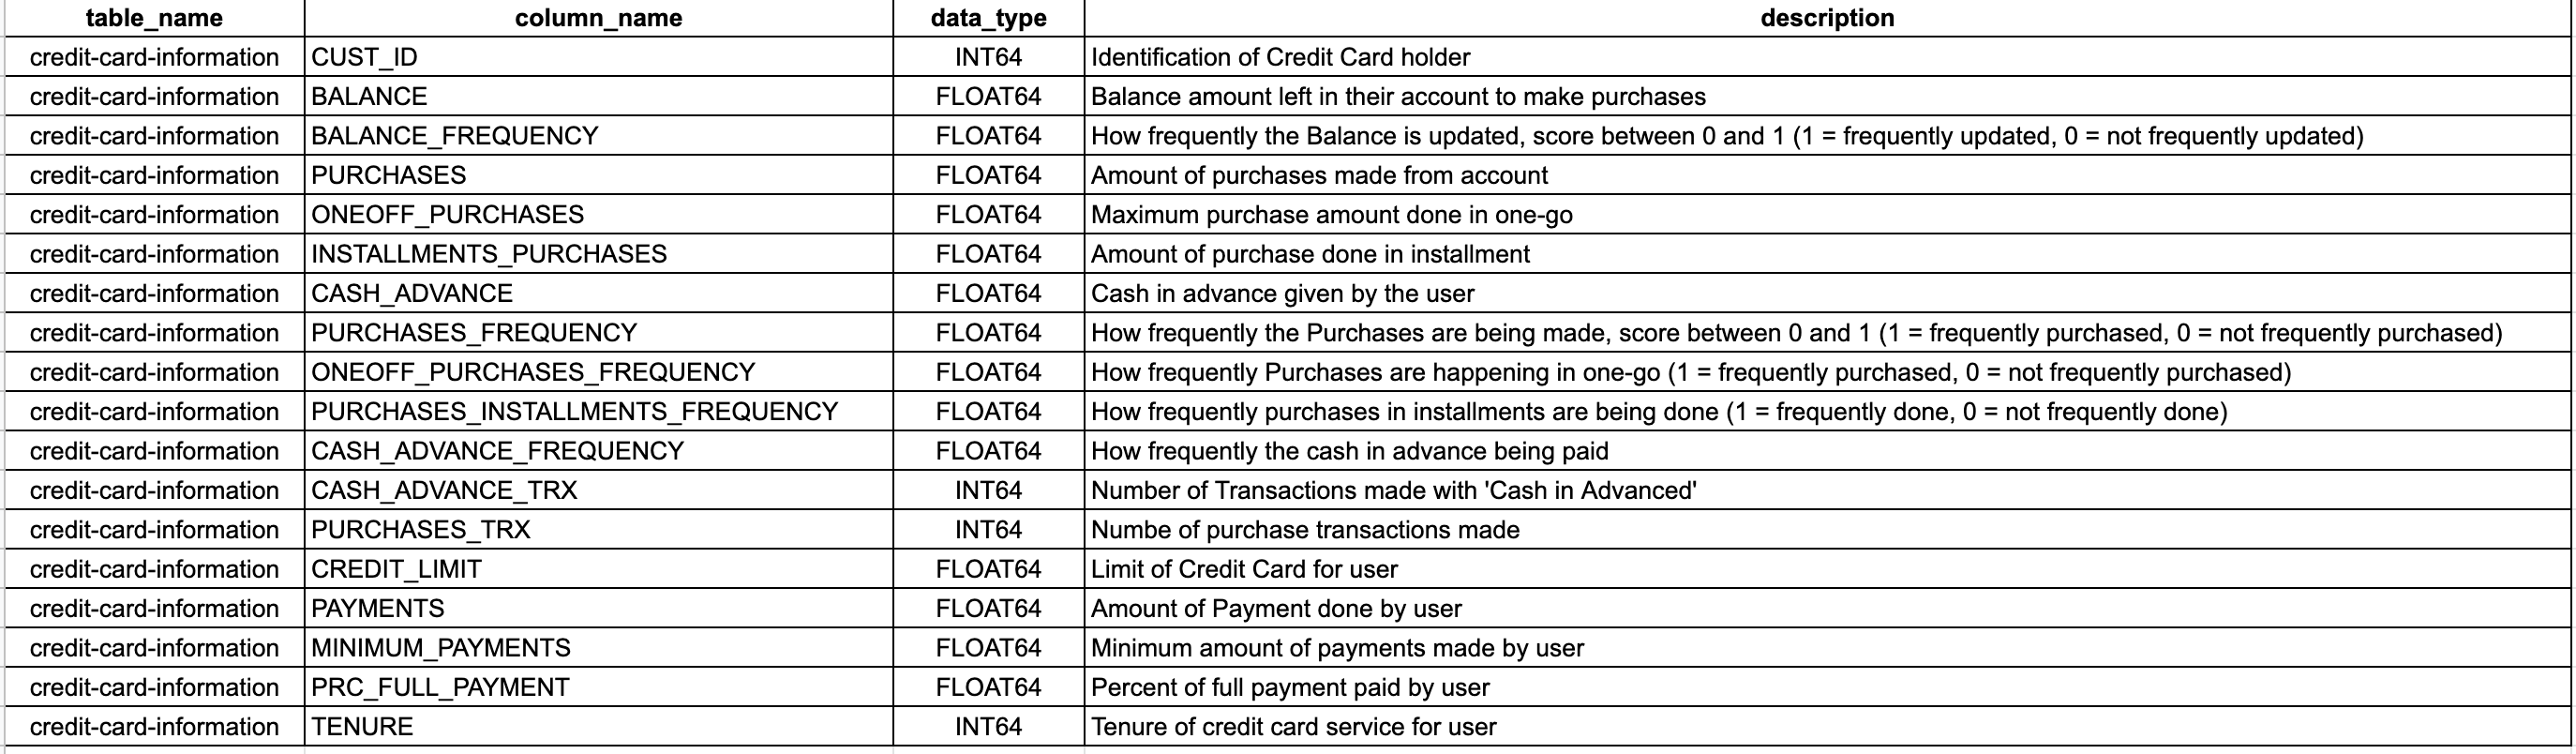

In [5]:
# Import png image.
from PIL import Image
myImage = Image.open("data_info.png")
myImage

Columns (features) with their corresponding descriptions. Note how some values (especially those of "Frequency") have a value range of between 0 to 1.

In [6]:
# Checking data types.
df.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

All data types in our dataset is numerical.

In [7]:
# Counting nulls in a column / feature.
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We must remove any NaNs (Not-A-Number) / Null values from our dataset. Here, we observe that there are 155 Nulls in the feature "MINIMUM_PAYMENTS."

In [8]:
df[['MINIMUM_PAYMENTS']].isnull().sum()

MINIMUM_PAYMENTS    155
dtype: int64

In [9]:
# Dropping rows with nulls.
df.dropna(axis=0, inplace=True)

In [10]:
# Rechecking minimum payments feature for any nulls.
df[['MINIMUM_PAYMENTS']].isnull().sum()

MINIMUM_PAYMENTS    0
dtype: int64

We can confirm that all nulls have been removed from our dataset.

In [11]:
# Visualization using histogram and boxplot.

def diagnostic_plots(df, variable):
    # Defining Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable])
    plt.title('Boxplot')

    plt.show() 
    
    # Skewness
    print('\nSkewness Value : ', df[variable].skew())

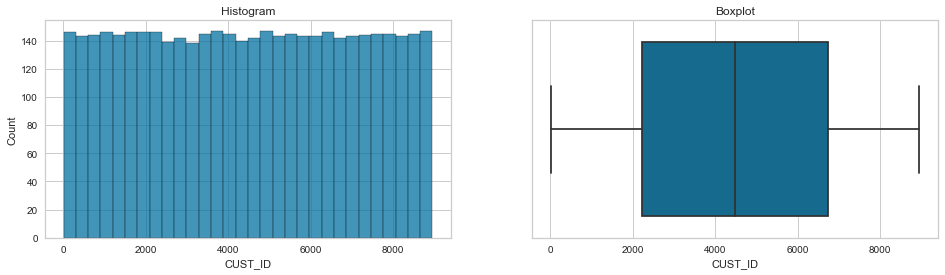


Skewness Value :  -0.000909576000153484


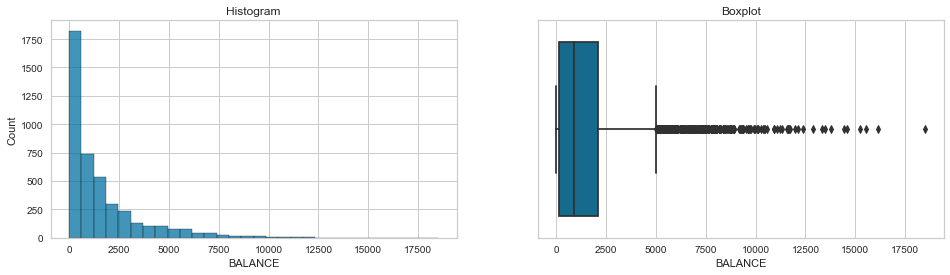


Skewness Value :  2.3060560083334405


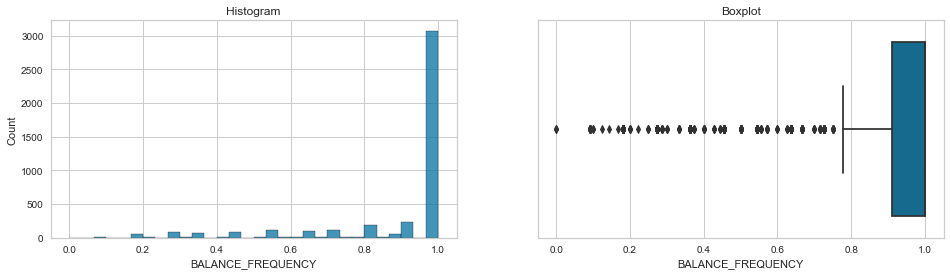


Skewness Value :  -2.085655942874467


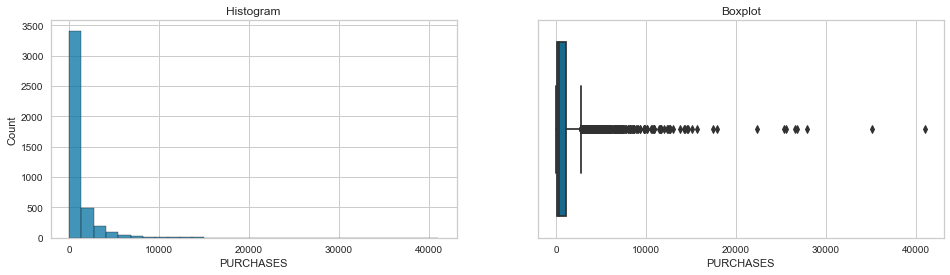


Skewness Value :  6.982698043897626


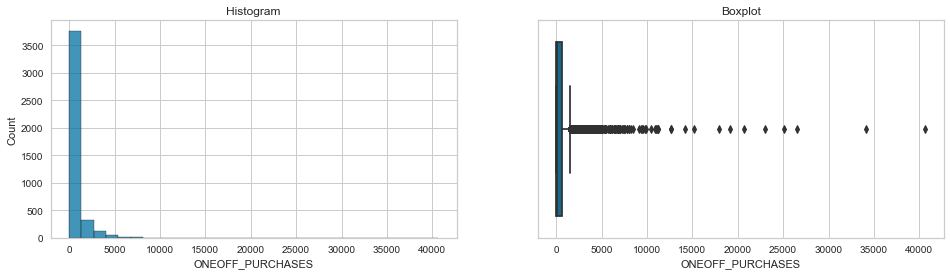


Skewness Value :  9.827307004944023


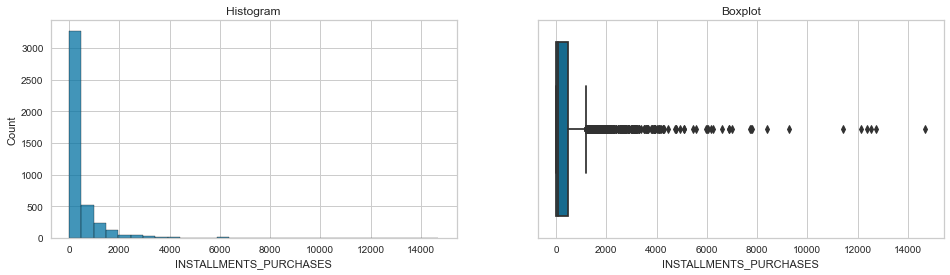


Skewness Value :  6.252820447484483


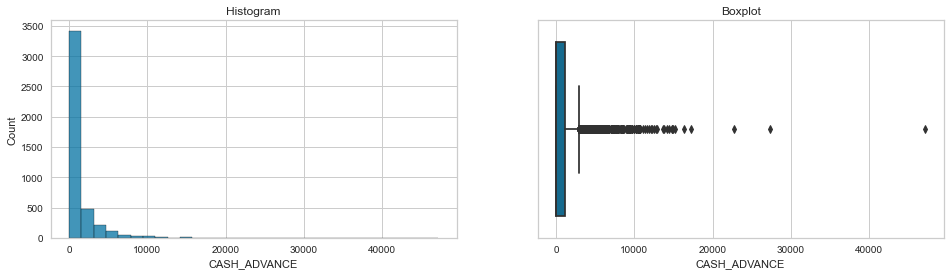


Skewness Value :  5.611537241356356


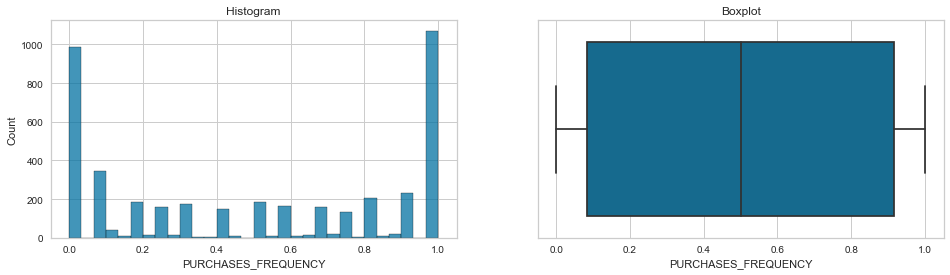


Skewness Value :  0.030477479947374164


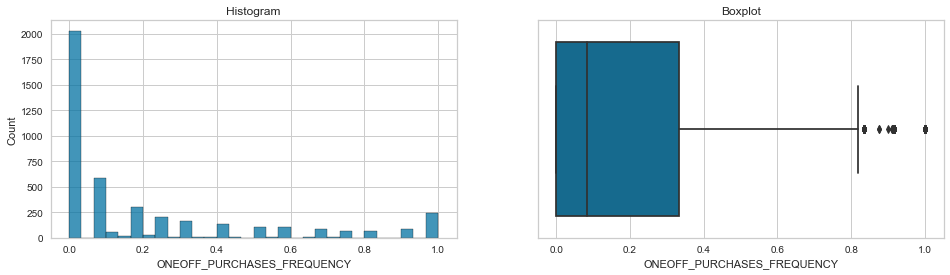


Skewness Value :  1.5142430379734177


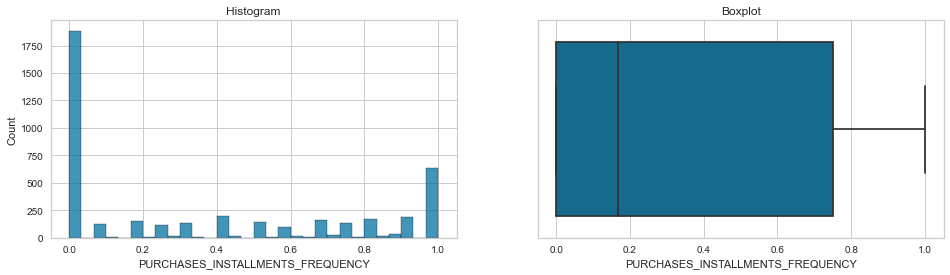


Skewness Value :  0.4891007516065457


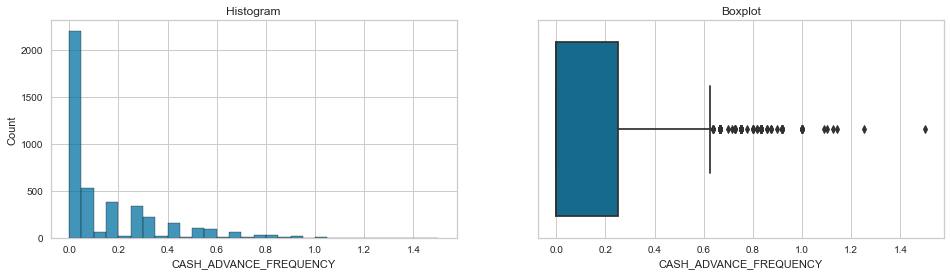


Skewness Value :  1.8028579475499225


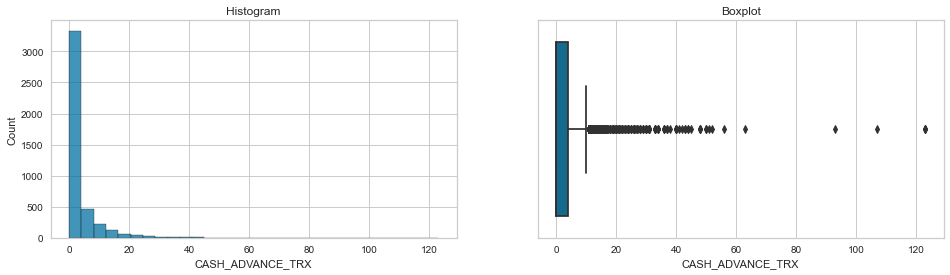


Skewness Value :  6.352409253171002


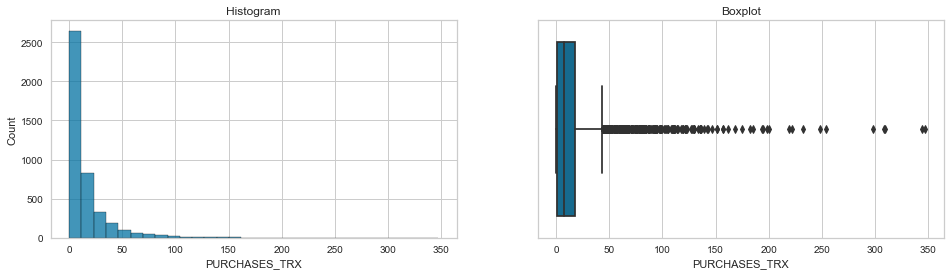


Skewness Value :  4.694066710265747


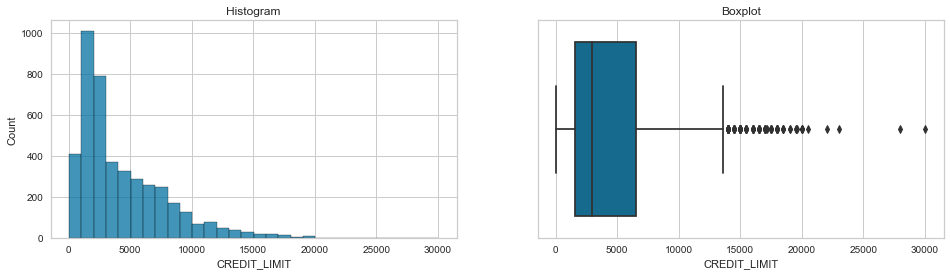


Skewness Value :  1.487940822693631


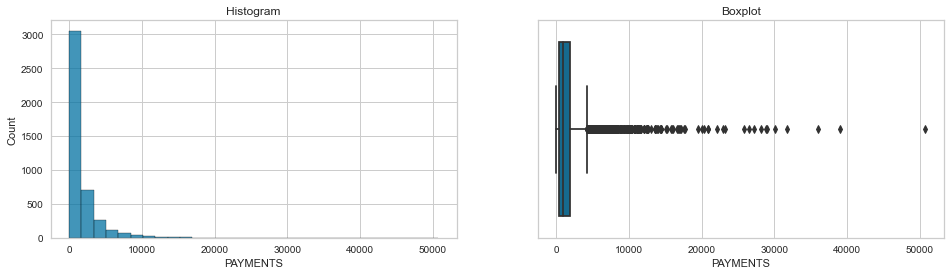


Skewness Value :  5.720098998110234


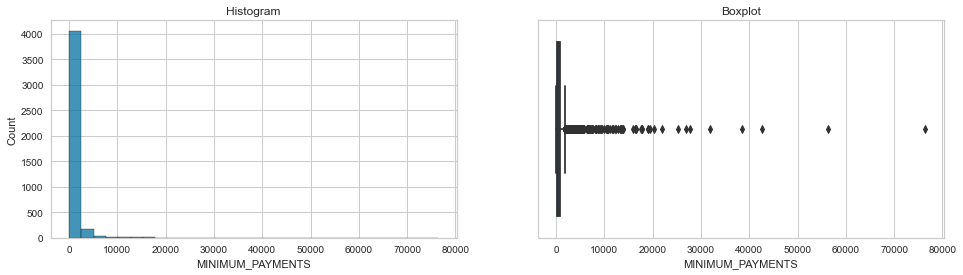


Skewness Value :  14.669771084332641


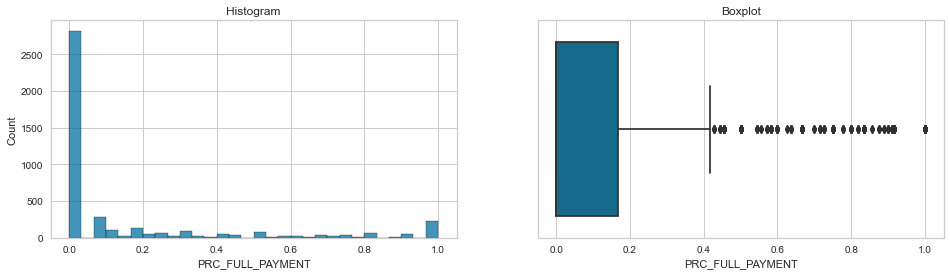


Skewness Value :  1.9189016413560516


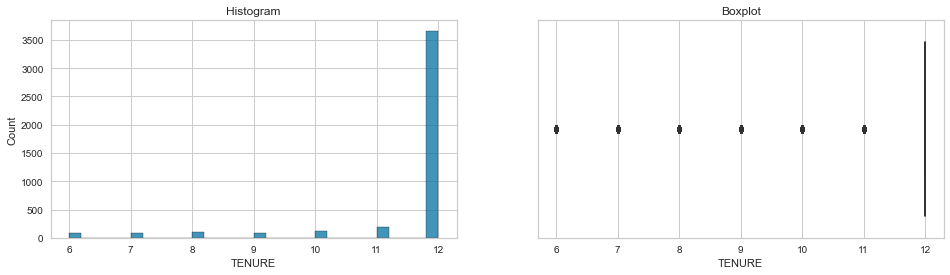


Skewness Value :  -3.026039686180468


In [12]:
# For loop to create visualization for all features.
for variable in df.columns:
    diagnostic_plots(df,variable)

Here, we can observe that most of our data is heavily skewed to the right. We will have to handle these skewness later since we will be doing dimensionality reduction (using PCA). PCA is sensitive to outliers.

## V. Data Preprocessing

### a. Outlier Handling

In [13]:
# Checking skewness of our data.
df.skew()

CUST_ID                             -0.000910
BALANCE                              2.306056
BALANCE_FREQUENCY                   -2.085656
PURCHASES                            6.982698
ONEOFF_PURCHASES                     9.827307
INSTALLMENTS_PURCHASES               6.252820
CASH_ADVANCE                         5.611537
PURCHASES_FREQUENCY                  0.030477
ONEOFF_PURCHASES_FREQUENCY           1.514243
PURCHASES_INSTALLMENTS_FREQUENCY     0.489101
CASH_ADVANCE_FREQUENCY               1.802858
CASH_ADVANCE_TRX                     6.352409
PURCHASES_TRX                        4.694067
CREDIT_LIMIT                         1.487941
PAYMENTS                             5.720099
MINIMUM_PAYMENTS                    14.669771
PRC_FULL_PAYMENT                     1.918902
TENURE                              -3.026040
dtype: float64

We will not be handling CUST_ID since this feature has no distinction for our model (it is unusable). PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY will also not be capped since they are relatively normally distributed (skewness of between -0.5 to 0.5). TENURE is also left out due to the capping only outputting one value, removing its distinctiveness.

In [14]:
# Handling outlier with capping / censoring (also calle Windsorizing).
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=3, # Using fold 3 since features being capped are all heavily skewed.
                          variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

# Fitting our dataset to the capper / windsorizer.
windsoriser.fit(df)

# Transforming dataset and defining into new dataset.
df1 = windsoriser.transform(df)

In [15]:
# Rechecking skewness after capping.
df1.skew()

CUST_ID                            -0.000910
BALANCE                             1.706206
BALANCE_FREQUENCY                  -1.445040
PURCHASES                           1.795914
ONEOFF_PURCHASES                    1.721561
INSTALLMENTS_PURCHASES              1.756603
CASH_ADVANCE                        1.673263
PURCHASES_FREQUENCY                 0.030477
ONEOFF_PURCHASES_FREQUENCY          1.514243
PURCHASES_INSTALLMENTS_FREQUENCY    0.489101
CASH_ADVANCE_FREQUENCY              1.738016
CASH_ADVANCE_TRX                    1.760131
PURCHASES_TRX                       1.792168
CREDIT_LIMIT                        1.409236
PAYMENTS                            1.713991
MINIMUM_PAYMENTS                    1.706266
PRC_FULL_PAYMENT                    1.586305
TENURE                             -3.026040
dtype: float64

Most of the data we have handled are still heavily skewed. However, they now fall into relatively similar skewness. Therefore, we will continue.

### b. Feature Scaling

In [16]:
# Checking central tendency, minimum, and maximum of dataset.
df1.describe()

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
count  4320.000000  4320.000000        4320.000000  4320.000000   
mean   4476.103704  1560.340961           0.924367   862.616634   
std    2588.710438  1905.265988           0.133097  1182.571627   
min       1.000000     0.000000           0.636364     0.000000   
25%    2222.500000   144.637202           0.909091    43.060000   
50%    4480.000000   917.879527           1.000000   373.605000   
75%    6719.500000  2096.706479           1.000000  1139.400000   
max    8949.000000  7952.914309           1.000000  4428.420000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4320.000000             4320.000000   4320.000000   
mean         440.317565              346.197778    846.287459   
std          708.462305              518.237714   1368.000622   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           48.500000               93.625000      0.000000   
75%          594.272500              469.897500   1161.692888   
max         2377.090000             1879.590000   4646.771553   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4320.000000                 4320.000000   
mean              0.496324                    0.206370   
std               0.403019                    0.300886   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4320.000000             4320.000000   
mean                           0.367836                0.138692   
std                            0.398013                0.201676   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.000000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
count       4320.000000    4320.000000   4320.000000  4320.000000   
mean           2.852778      13.600926   4515.539784  1557.450174   
std            4.493013      17.633019   3606.325150  1681.844941   
min            0.000000       0.000000     50.000000     0.049513   
25%            0.000000       1.000000   1600.000000   409.419019   
50%            0.000000       7.000000   3000.000000   923.130730   
75%            4.000000      18.000000   6500.000000  1942.091153   
max           16.000000      69.000000  21200.000000  6540.107553   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4320.000000  4320.000000  
mean         647.185158          0.130347    11.537269  
std          738.148394          0.227834     1.297405  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.166667    12.000000  
max         2771.713888          0.666668    12.000000

Referencing from the dataset origins, and from the table above, we can reconcur that some features have a range of between 0 and 1. As such, we will consider them to be values that have been Normalized / scaled using Min-Max Scaler. Therefore, we will not include them in our scaling process. Instead, we will Normalize the features in our dataset that have not been scaled. We are also using Normalizing / Min-Max Scaler because our data is still skewed.

In [17]:
# Splitting dataset where X_toscale is features that have not been scaled, and X_noscale have been scaled.
X_toscale = df1.drop(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'], axis=1)
X_noscale = df1[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']]

In [18]:
# Defining scaler.
scaler = MinMaxScaler()

# Fitting features to be scaled.
scaler.fit(X_toscale)

# Scaling features.
X_scaled = scaler.transform(X_toscale)

In [19]:
# Switching dataset back to dataframe.
X_scaled = pd.DataFrame(X_scaled)

In [20]:
# Concat / rejoining scaled and non-scaled data.
X_concat = pd.concat([X_scaled,X_noscale.reset_index(drop=True)],axis=1)

In [21]:
# Changing final concat dataset to array for PCA process.
X_final=np.array(X_concat)

### c. PCA

In [22]:
X_concat.describe()

0            1            2            3            4  \
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean      0.196197     0.194791     0.185234     0.184188     0.182124   
std       0.239568     0.267041     0.298038     0.275718     0.294398   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.018187     0.009724     0.000000     0.000000     0.000000   
50%       0.115414     0.084365     0.020403     0.049811     0.000000   
75%       0.263640     0.257293     0.250000     0.250000     0.250000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  4320.000000  4320.000000  4320.000000  4320.000000  4320.000000   
mean      0.178299     0.197115     0.211137     0.238133     0.233491   
std       0.280813     0.255551     0.170512     0.257161     0.266317   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.014493     0.073286     0.062594     0.060819   
50%       0.000000     0.101449     0.139480     0.141143     0.113274   
75%       0.250000     0.260870     0.304965     0.296946     0.295614   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                10           11  BALANCE_FREQUENCY  PURCHASES_FREQUENCY  \
count  4320.000000  4320.000000        4320.000000          4320.000000   
mean      0.195520     0.922878           0.924367             0.496324   
std       0.341751     0.216234           0.133097             0.403019   
min       0.000000     0.000000           0.636364             0.000000   
25%       0.000000     1.000000           0.909091             0.083333   
50%       0.000000     1.000000           1.000000             0.500000   
75%       0.250000     1.000000           1.000000             0.916667   
max       1.000000     1.000000           1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4320.000000                       4320.000000   
mean                     0.206370                          0.367836   
std                      0.300886                          0.398013   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  
count             4320.000000  
mean                 0.138692  
std                  0.201676  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.250000  
max                  1.000000

In [23]:
# Checking shape of dataset for n_components input.
X_concat.shape

(4320, 17)

We have 17 features that we will input to n_components.

In [24]:
# Defining PCA.
pca = PCA(n_components = 17)
pca.fit(X_final)

PCA(n_components=17)

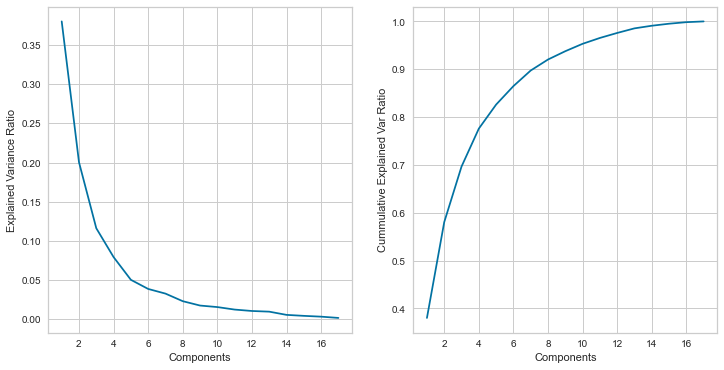

In [25]:
# Visualizing Explained Variance Ratio and Cumulative Explained Variance Ratio.
fig,ax=plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(range(1,18),pca.explained_variance_ratio_)
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

In this case, we are looking to retain 90% information from our data as well as reducing the dimension. Therefore, looking at the cumulative explained variance ratio, we can assume that 7 components is enough to retain 90% of information.

In [26]:
# Choosing new n_components and fitting data.
pca2 = PCA(n_components = 7)
pca2.fit(X_final)

PCA(n_components=7)

In [27]:
# Transforming dataset.
X = pca2.transform(X_final)
X.shape

(4320, 7)

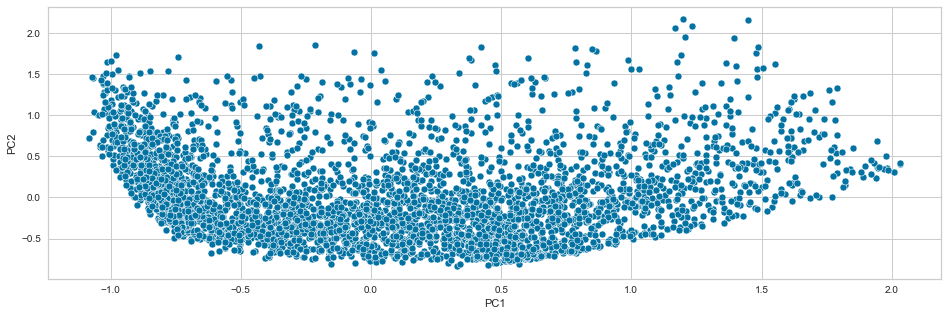

In [28]:
# Plotting PCA 1 and PCA 2 graph.
plt.figure(figsize=(16, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

This is a visualization of our dataset before the entries are seperated into clusters.

## VI. Model Definition

### a. K-Means

To define the K-Means model, we must first determine the optimum number of clusters by using KElbowVisualizer. We are testing two algorithms for K-Means to find a preference. We would like a balance in the elbow in which inertia (in this case we are using distortion score) and fit time is not too high. 

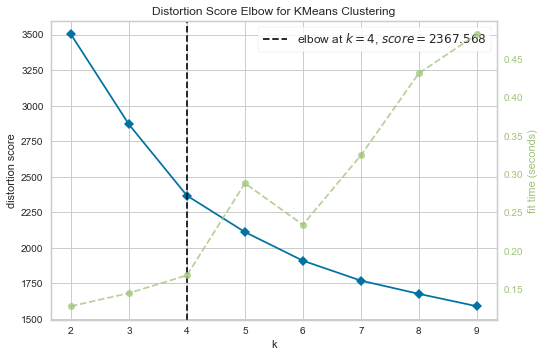

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Plotting Elbow Method graph using Lloyd algorithm.
Elbow_KM1 = KElbowVisualizer(KMeans(), k=9, algorithm='lloyd')
Elbow_KM1.fit(X)
Elbow_KM1.show()

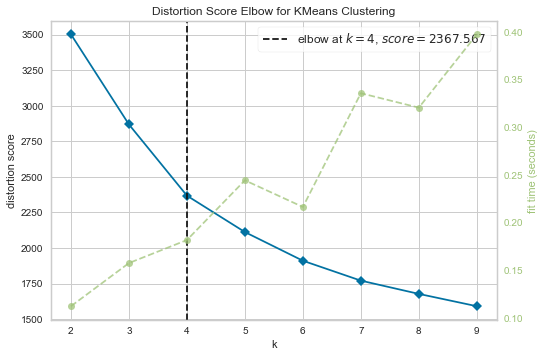

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Plotting Elbow Method graph using Elkan algorithm.
Elbow_KM2 = KElbowVisualizer(KMeans(), k=9, algorithm='elkan')
Elbow_KM2.fit(X)
Elbow_KM2.show()

In this case, the Elbow Method using the K-Means algorithm "Elkan" gives us a better elbow score at 2367.568 compared to the "Llyod" algorithm elbow score at 2367.567. Therefore, we are looking at using cluster number of 4 / K=4.

However, we will be further reinforcing this choice by using Silhouette Score.

In [31]:
# Defining silhouette score.
k = [2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=6).fit(X) for k in range (1,10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

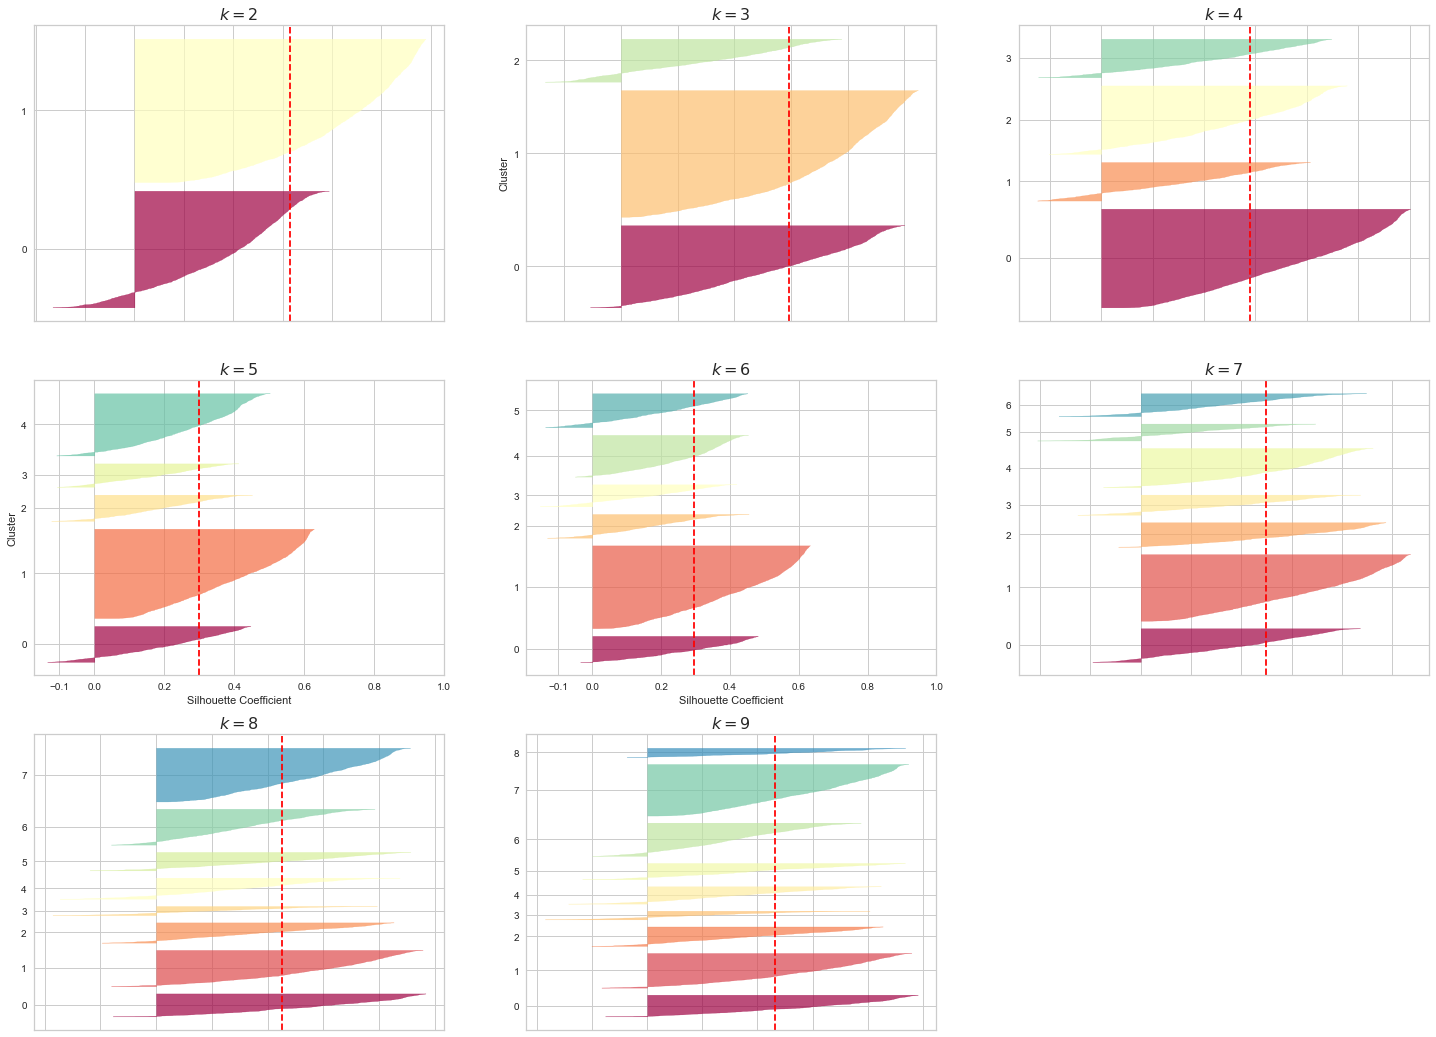

In [32]:
# Visualizing Silhouette Score.
plt.figure(figsize=(25, 25))

for k in (2,3,4,5,6,7,8,9):
    plt.subplot(4,3,k-1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
    if k in (5,6):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

We are looking for the visualization which gives us an output of the data that are similar to one another in size and shape. One other crucial parameter to look at is that they have all crossed the red line. However, the graphs above do not concretely tell us which number of components / K is best. Therefore, we will be using a line graph to better grasp which K number is best.

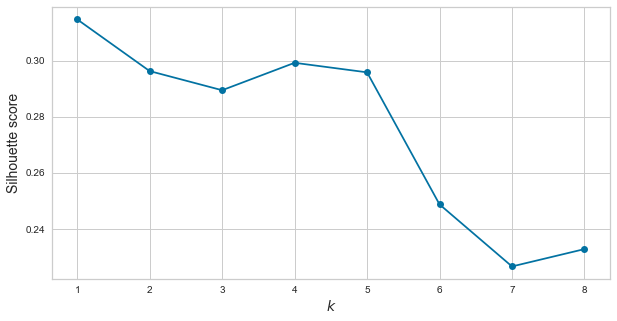

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

We are looking at the K number with the highest silhouette score. However, K=1 is not possible for use. Therefore, we will be using K=4, which is also the cluster number of choice from our Elbow Method.

In [34]:
# Defining the KMeans model.
kmeans = KMeans(n_clusters=4, algorithm='elkan', random_state=6)

### b. Spectral Clustering

In [35]:
# Defining silhouette score.
k = [2,3,4,5,6,7,8,9]
kmeans_per_k_SC = [SpectralClustering(n_clusters=k, random_state=6).fit(X) for k in range (1,10)]
silhouette_scores_SC = [silhouette_score(X, model.labels_) for model in kmeans_per_k_SC[1:]]

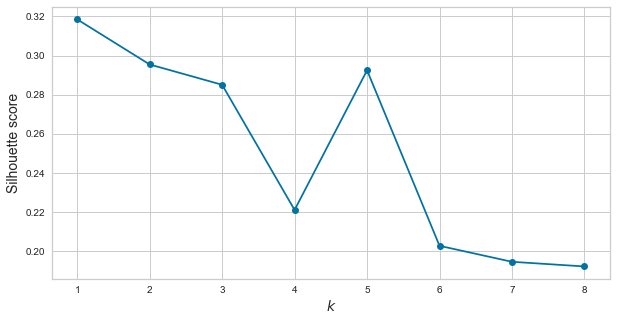

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), silhouette_scores_SC, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

For the Spectral Clustering model, we cannot use Elbow Method. Therefore, we will only ascertaining the optimal number of clusters from its Silhouette Score, which is 5 clusters / K=5.

In [37]:
# Defining the Spectral Clustering model.
spectral = SpectralClustering(n_clusters=2, random_state=6)

### c. DBSCAN

In [38]:
# Plotting DBSCAN clustering results for Hyperparameter Tuning.
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="black", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

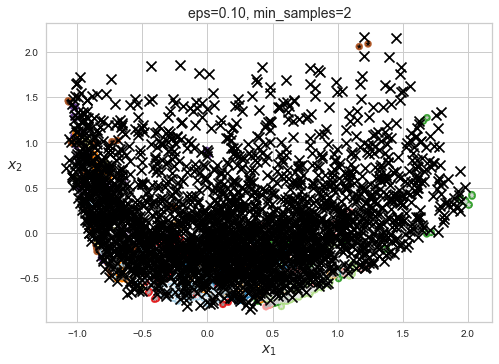

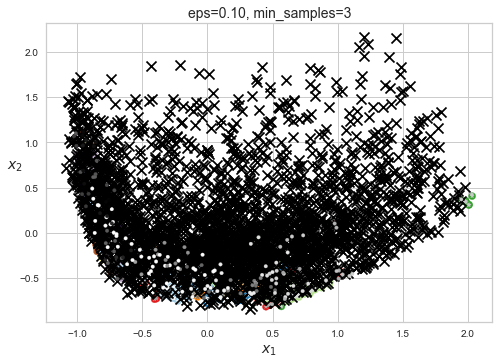

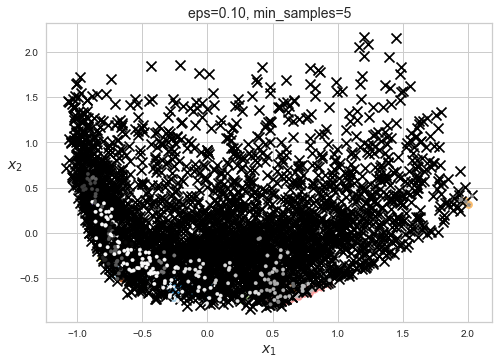

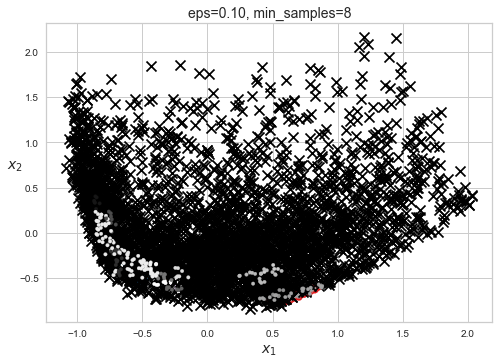

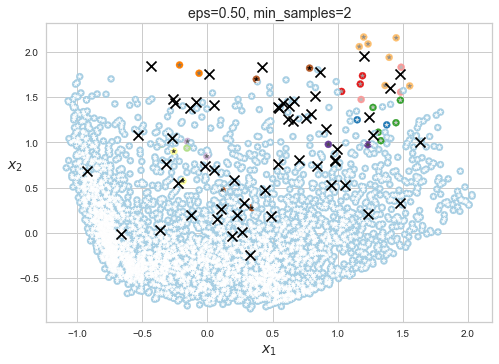

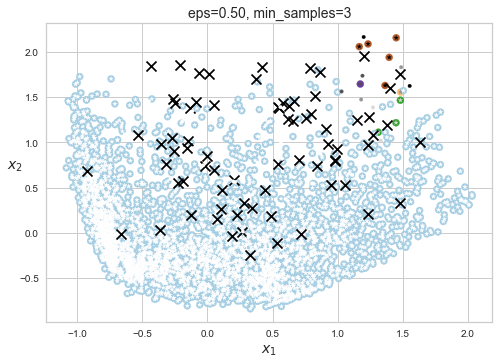

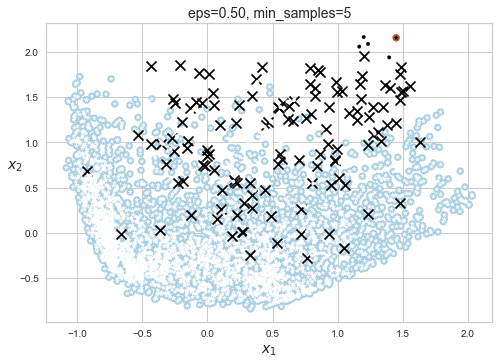

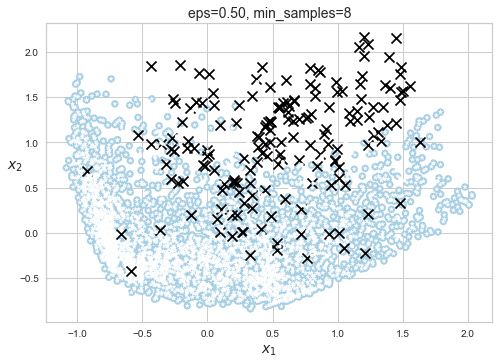

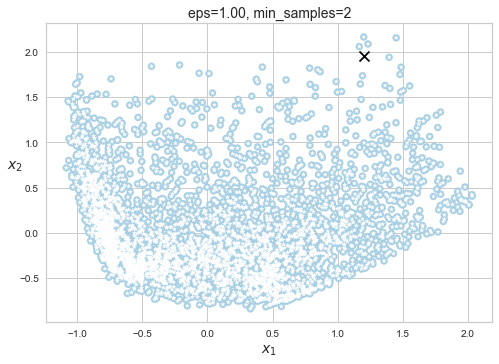

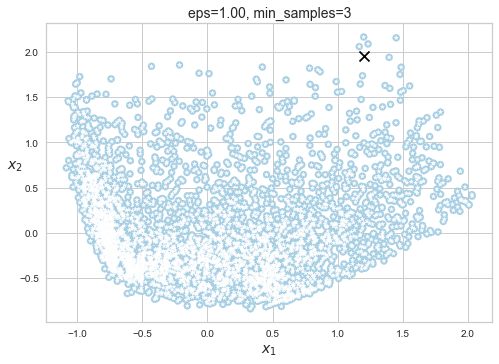

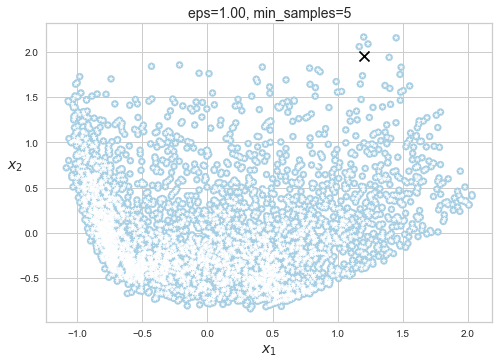

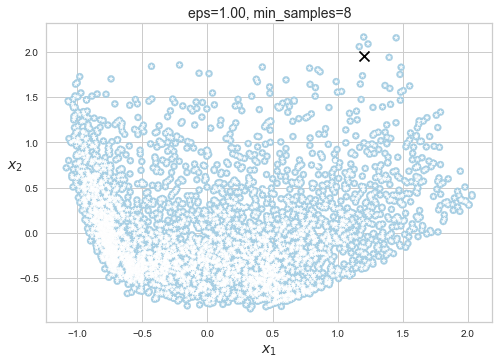

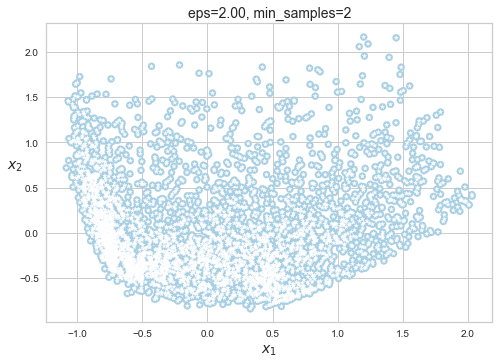

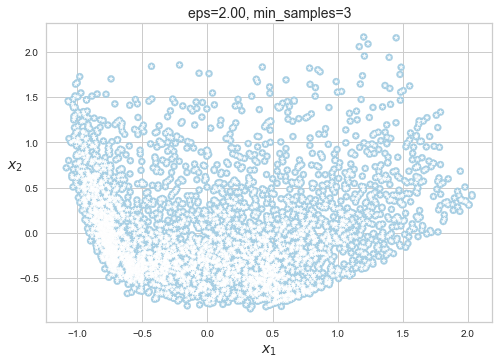

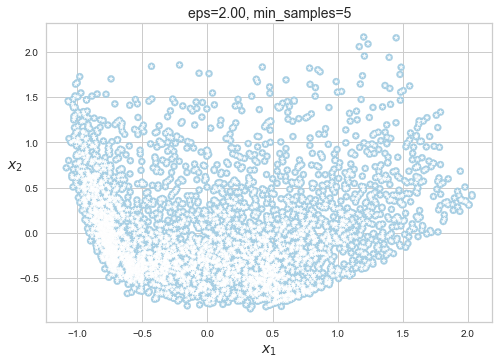

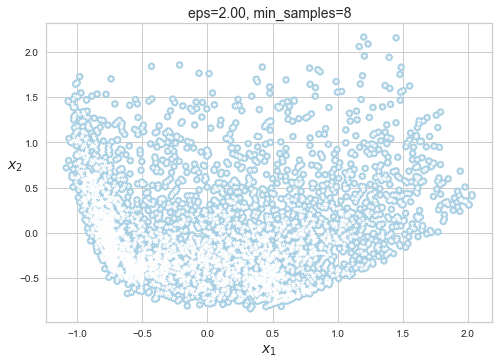

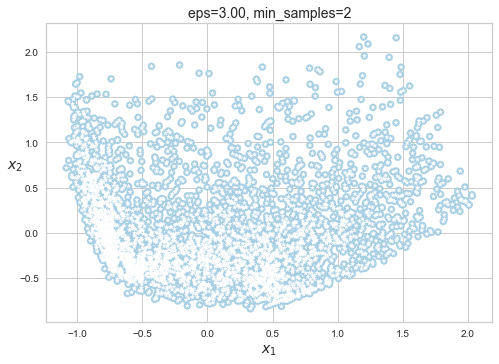

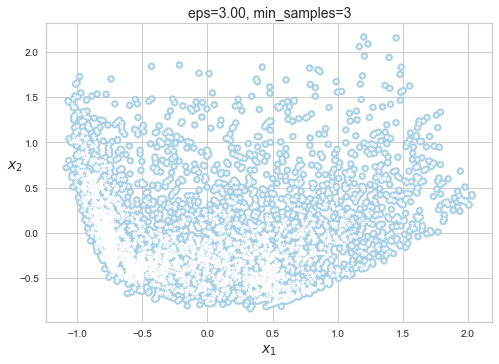

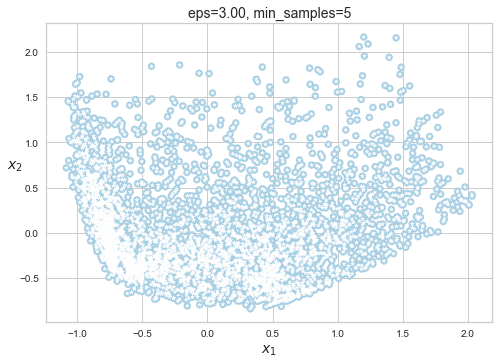

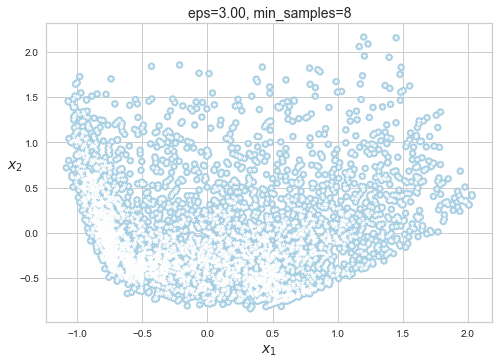

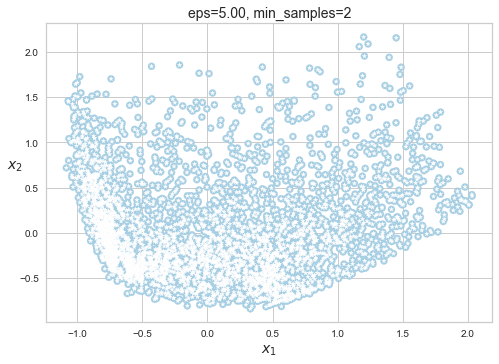

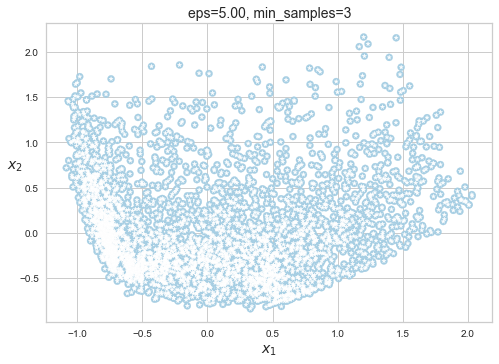

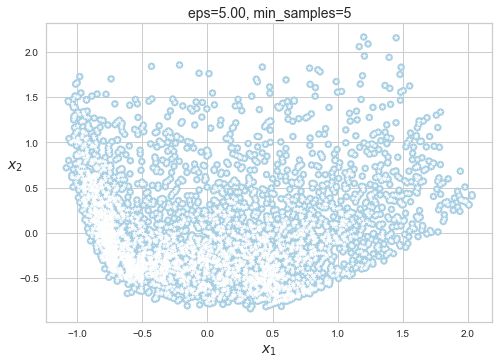

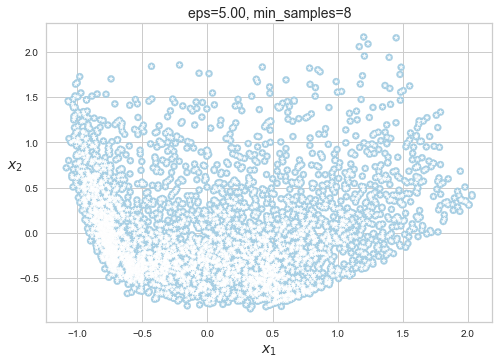

In [39]:
# Defining hyperparameters to be tested.
for e in [0.1, 0.5, 1, 2, 3, 5]:
    for s in [2, 3, 5, 8]:
        db_model = DBSCAN(eps=e, min_samples=s)
        db_model.fit(X)
        plot_dbscan(db_model, X, size=50)
        plt.show()

DBSCAN is not optimum for the dataset since DBSCAN is based on entry data distance, and because our data is clustered close to each other. As such, a high epsilon (radius between data entries), regardless of minimum samples (which clusters data together based on how many data are around one entry), would mean that all our data would end up in one cluster. On the other hand, a lower epsilon would result in a lot of our data ending up as outliers, or in their own clusters (with each cluster sometimes having only one data entry). 

In [40]:
# We will be choosing a random model definition from the graphs above.
dbscan = DBSCAN(eps=1, min_samples=3)

## VII. Model Training

### a. K-Means

In [41]:
kmeans.fit(X)

KMeans(algorithm='elkan', n_clusters=4, random_state=6)

### b. Spectral Clustering

In [42]:
spectral.fit(X)

SpectralClustering(n_clusters=2, random_state=6)

### c. DBSCAN

In [43]:
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

## VIII. Model Evaluation

### a. K-Means

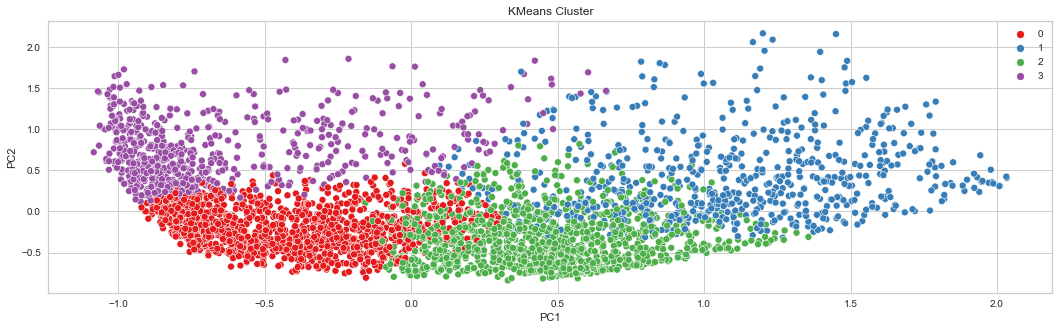

In [44]:
# Visualizing K-Means model.
plt.figure(figsize=(18,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Cluster')
plt.show()

In [45]:
# Inputting Cluster output / definition into our original dataset.
X_cluster_km = df.copy()
X_cluster_km['Cluster'] = kmeans.labels_
X_cluster_km.sort_values('Cluster')

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2        6075   757.964752           0.875000     157.40            157.40   
3260     2237  1915.245632           1.000000      39.00             39.00   
3261     2367    56.116326           0.181818     368.47            368.47   
3262     2609  1386.949394           1.000000     227.56            177.56   
3263     2631     6.260598           0.545455      35.00             35.00   
...       ...          ...                ...        ...               ...   
3530     8105  1371.488874           1.000000       0.00              0.00   
3531     8161  4735.107991           1.000000       0.00              0.00   
3534     8367  5376.083101           1.000000       0.00              0.00   
3539     1073  1037.137052           1.000000     549.00            549.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3260                     0.0     92.668977             0.083333   
3261                     0.0     66.320495             0.083333   
3262                    50.0    960.590608             0.083333   
3263                     0.0     18.280043             0.083333   
...                      ...           ...                  ...   
3530                     0.0   3163.898453             0.000000   
3531                     0.0   2934.049373             0.000000   
3534                     0.0   2293.529361             0.000000   
3539                     0.0    882.773966             0.250000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                          0.000000   
3260                    0.083333                          0.000000   
3261                    0.083333                          0.000000   
3262                    0.083333                          0.083333   
3263                    0.083333                          0.000000   
...                          ...                               ...   
3530                    0.000000                          0.000000   
3531                    0.000000                          0.000000   
3534                    0.000000                          0.000000   
3539                    0.250000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3260                0.083333                 1              1        1950.0   
3261                0.083333                 2              5        2500.0   
3262                0.083333                 6              2        3000.0   
3263                0.083333                 1              1        1000.0   
...                      ...               ...            ...           ...   
3530                0.333333                11              0        3500.0   
3531                0.333333                10              0        6000.0   
3534                0.333333                 8              0        5500.0   
3539                0.333333                 5              3        4000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2     1494.480376       2638.598410          0.000000       8        0  
3260   542.919146        814.880073          0.000000      12        0  
3261   174.470592        167.468800          1.000000      12        0  
3262   319.354000        388.368299          0.000000      12        0  
3263   110.318859         59.475914          0.333333      12        0  
...           ...               ... 

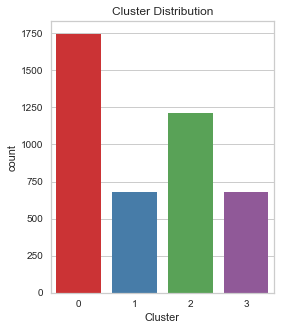

In [46]:
# Plotting count of how much data end up in specific Clusters.
plt.figure(figsize=(4,5))
sns.countplot(data=X_cluster_km, x='Cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

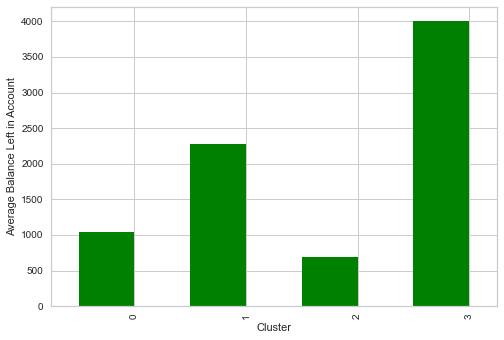

In [51]:
km1 = X_cluster_km.groupby('Cluster')['BALANCE'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km1.plot(kind='bar', color='green', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Balance Left in Account')
plt.show()

Cluster 3 has the most users with an averagely high balance on their account, at around $4000. Cluster 2 has the lowest, with users averaging at having only about $700 in their account. Cluster 1 is half the size of Cluster 3, with users having an average of $2250 left in their account. Cluster 0 is close to Cluster 2, at only around an average of $1000 left in a user's account.

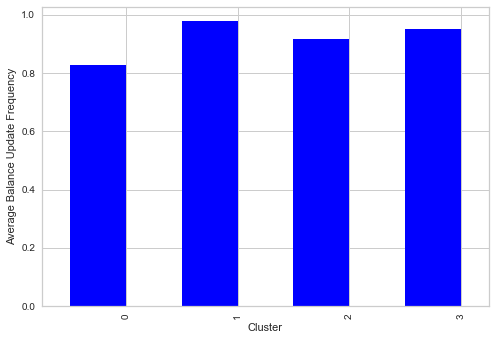

In [52]:
km2 = X_cluster_km.groupby('Cluster')['BALANCE_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km2.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Balance Update Frequency')
plt.show()

With frequency above 0.5 denoting that an action is taken frequently, we can summarize that all Clusters in average update their balances frequently.

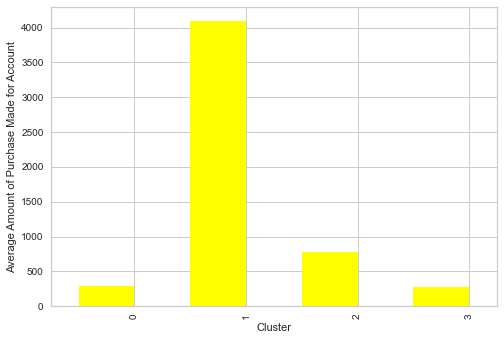

In [53]:
km3 = X_cluster_km.groupby('Cluster')['PURCHASES'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km3.plot(kind='bar', color='yellow', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Purchase Made for Account')
plt.show()

Cluster 1 makes the most average amount of purchases at about 4000 purchases made. Cluster 2 stands second at about 750 average purchases, whilst Cluster 0 and Cluster 3 have the least average amount of purchases at about 300 each.

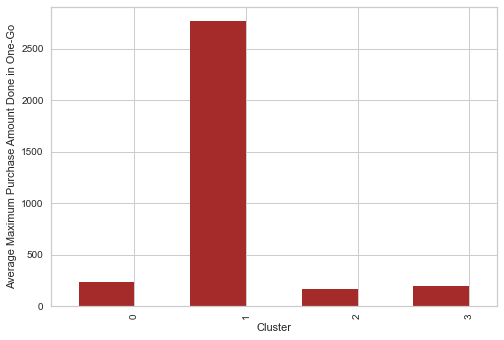

In [57]:
km4 = X_cluster_km.groupby('Cluster')['ONEOFF_PURCHASES'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km4.plot(kind='bar', color='brown', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Maximum Purchase Amount Done in One-Go')
plt.show()

Cluster 1 has in average the most Oneoff Purchases / Maximum Purchase Amount done in one-go. In short, the users there have managed to averagely have a purchase as much as 2700 transactions / items in one-go. Clusters 0, 2, and 3 stands low at only averaging a one-go purchase of about 250.

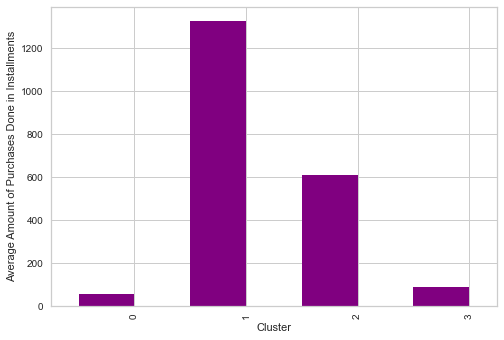

In [58]:
km5 = X_cluster_km.groupby('Cluster')['INSTALLMENTS_PURCHASES'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km5.plot(kind='bar', color='purple', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Purchases Done in Installments')
plt.show()

Cluster 1 users have an averagely high amount of purchases done in installments at about 1300. Cluster 2 is half of that at about 600, whilst Clusters 0 and 3 have the lowest average at about 60.

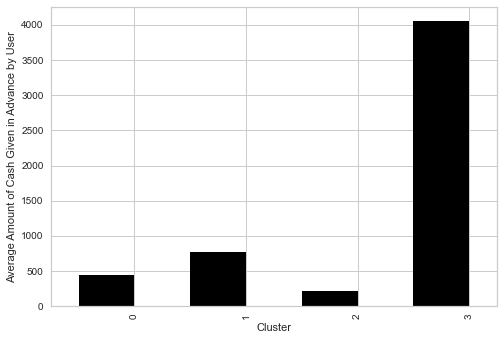

In [60]:
km6 = X_cluster_km.groupby('Cluster')['CASH_ADVANCE'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km6.plot(kind='bar', color='black', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Cash Given in Advance by User')
plt.show()

Cluster 3 users have averagely given the most cash in advance at about $4000 given. Clusters 0, 1, and 2 stands far below, at an average of about $500, $750, and $200 respectively.

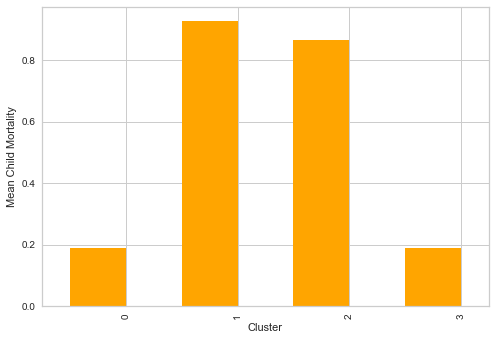

In [62]:
km7 = X_cluster_km.groupby('Cluster')['PURCHASES_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km7.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Purchases Made')
plt.show()

With threshold of frequency at 0.5, we can summarize that users in Clusters 1 and 2 would in average frequently make purchases, whilst users in Clusters 0 and 3 would in average infrequently make purchases.

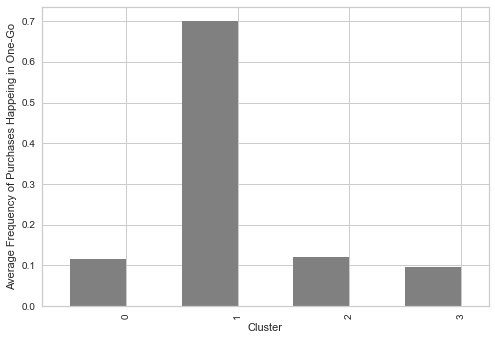

In [63]:
km8 = X_cluster_km.groupby('Cluster')['ONEOFF_PURCHASES_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km8.plot(kind='bar', color='grey', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Purchases Happeing in One-Go')
plt.show()

Users in Cluster 1 would in average frequently make Oneoff Purchases (high purchase amounts in one-go), whilst the rest would in average infrequently do so.

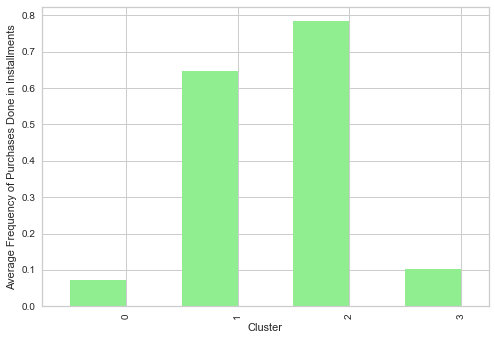

In [65]:
km9 = X_cluster_km.groupby('Cluster')['PURCHASES_INSTALLMENTS_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km9.plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Purchases Done in Installments')
plt.show()

Users in Clusters 1 and 2 would in average frequently make purchases done in installments, whilst Clusters 0 and 3 would in average infrequently do so.

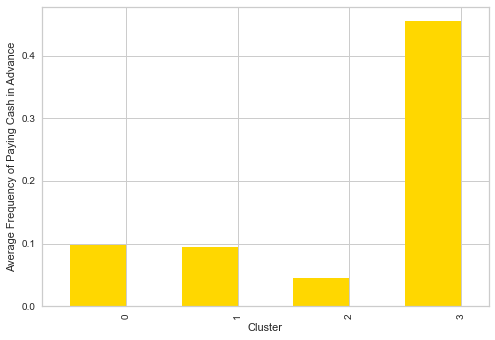

In [69]:
km10 = X_cluster_km.groupby('Cluster')['CASH_ADVANCE_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km10.plot(kind='bar', color='gold', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Paying Cash in Advance')
plt.show()

The users in all Clusters would in average infrequently pay cash in advance.

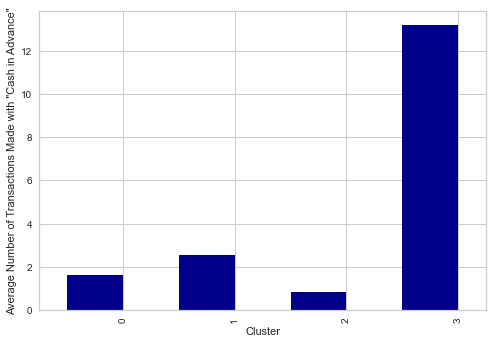

In [70]:
km11 = X_cluster_km.groupby('Cluster')['CASH_ADVANCE_TRX'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km11.plot(kind='bar', color='darkblue', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Number of Transactions Made with "Cash in Advance"')
plt.show()

Cluster 3 would make the most average number of transactions with cash in advance per user at an average of 13 transactions done. Clusters 0, 1, and 2 would make the least at about 1 - 2 transactions each.

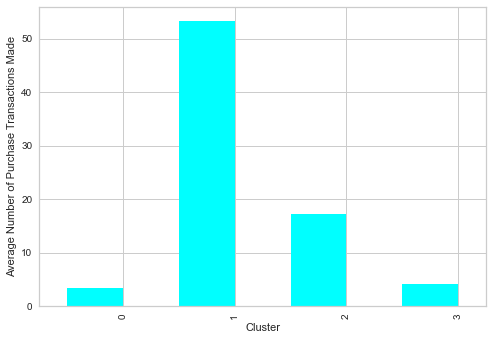

In [72]:
km12 = X_cluster_km.groupby('Cluster')['PURCHASES_TRX'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km12.plot(kind='bar', color='cyan', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchase Transactions Made')
plt.show()

Cluster 1 has the most average number of purchase transactions made at about 50 transactions. Cluster 0 and 3 has the least at about 19, whilst Cluster 2 averages at about 18 purchase transactions done per user.

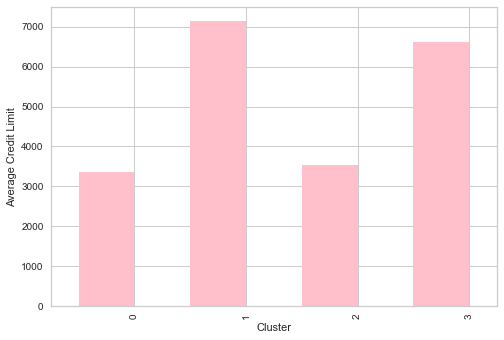

In [74]:
km13 = X_cluster_km.groupby('Cluster')['CREDIT_LIMIT'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km13.plot(kind='bar', color='pink', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Credit Limit')
plt.show()

Users in Cluster 1 has the highest average credit limit at about $7000, whilst Cluster 0 has the lowest at about $3200. Cluster 2 stands close to Cluster 0, averaging a credit limit of about $3500, whilst Cluster 3 is closer to Cluster 1 at a credit limit averaging at about $6500.

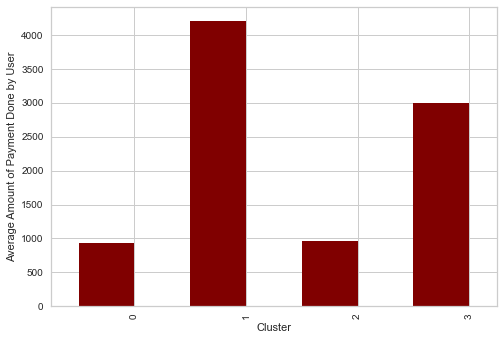

In [76]:
km14 = X_cluster_km.groupby('Cluster')['PAYMENTS'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km14.plot(kind='bar', color='maroon', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Payment Done by User')
plt.show()

Cluster 1 has the highest average amount of payment done by a user, at about $4200. Clusters 0 and 2 has the lowest average amount of payment done by a user, at close to $1000 each. Cluster 3 stands alone in the middle, with an average amount of payment done by a user at about $3000.

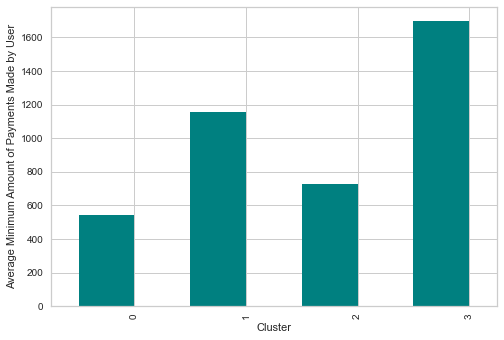

In [78]:
km15 = X_cluster_km.groupby('Cluster')['MINIMUM_PAYMENTS'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km15.plot(kind='bar', color='teal', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Minimum Amount of Payments Made by User')
plt.show()

Cluster 3 has the highest average minimum amount of payments made by a user, at about $1700. Cluster 1 comes second at about $1200, whilst Clusters 2 and 0 comes next, averaging a minimum amount of payments per user of a bout $700 and $550 respectively.

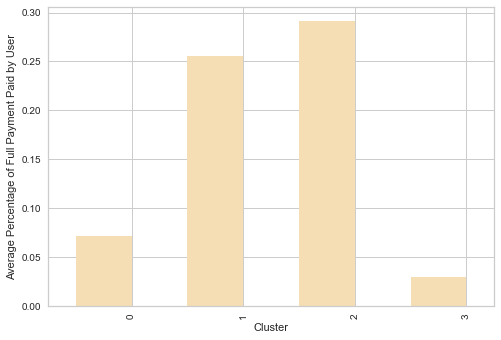

In [82]:
km16 = X_cluster_km.groupby('Cluster')['PRC_FULL_PAYMENT'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km16.plot(kind='bar', color='wheat', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Percentage of Full Payment Paid by User')
plt.show()

Cluster 2 has the highest average percentage of full payment paid by a user at almost 30%, whilst Cluster 1 comes second at about 25%. Cluster 3 is the lowest, with an average percentage of about 2.5%, whilst Cluster 0 averages a percentage of about 7%.

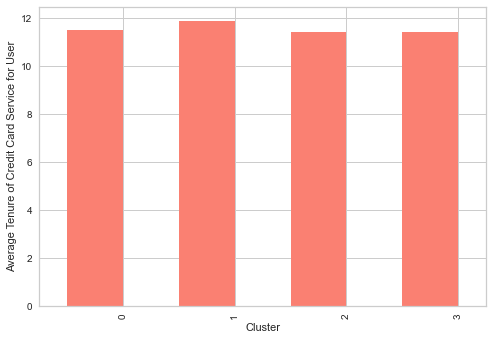

In [81]:
km17 = X_cluster_km.groupby('Cluster')['TENURE'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

km17.plot(kind='bar', color='salmon', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Tenure of Credit Card Service for User')
plt.show()

All clusters have an average tenure of about 11.

### b. Spectral Clustering

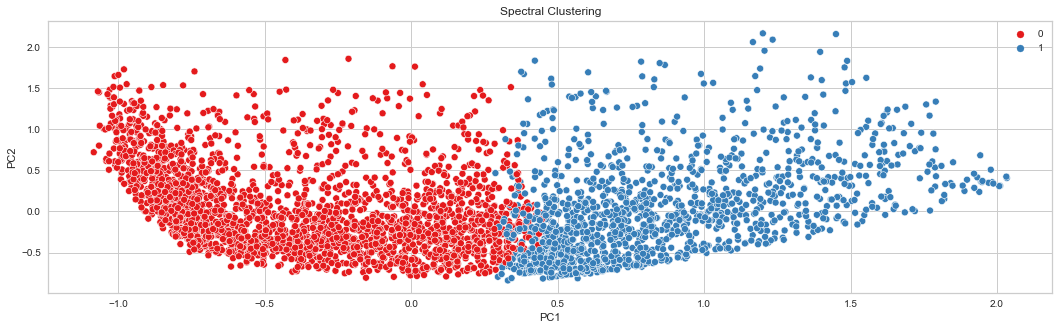

In [83]:
# Visualizing Spectral Clustering model.
plt.figure(figsize=(18,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=spectral.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clustering')
plt.show()

In [84]:
X_cluster_spec = df.copy()
X_cluster_spec['Cluster'] = spectral.labels_
X_cluster_spec.sort_values('Cluster')

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2        6075   757.964752           0.875000     157.40            157.40   
2864     7917   919.799915           0.857143     320.01             69.00   
2865      425   328.943655           0.714286       0.00              0.00   
2867     1835  3168.902659           0.857143       0.00              0.00   
2869     3681  1019.135688           1.000000       0.00              0.00   
...       ...          ...                ...        ...               ...   
3382     5549  4858.925320           1.000000    9282.12           1578.86   
3381     4373   906.573724           1.000000    1039.20             80.00   
946      7103    17.657534           1.000000     180.25              0.00   
3378     3609   162.972111           0.909091    1586.60              0.00   
1044     8091  1818.964688           1.000000    1436.41           1300.09   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                       0.00      0.000000             0.125000   
2864                  251.01   1056.477112             0.857143   
2865                    0.00    746.311927             0.000000   
2867                    0.00   3854.441191             0.000000   
2869                    0.00   1153.912092             0.000000   
...                      ...           ...                  ...   
3382                 7703.26   4446.461559             0.833333   
3381                  959.20    103.102091             0.833333   
946                   180.25      0.000000             1.000000   
3378                 1586.60    110.671623             0.833333   
1044                  136.32      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                          0.000000   
2864                    0.142857                          0.714286   
2865                    0.000000                          0.000000   
2867                    0.000000                          0.000000   
2869                    0.000000                          0.000000   
...                          ...                               ...   
3382                    0.500000                          0.666667   
3381                    0.083333                          0.833333   
946                     0.000000                          0.857143   
3378                    0.000000                          0.750000   
1044                    0.583333                          1.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
2864                0.142857                 3              7        1200.0   
2865                0.285714                 2              0        1500.0   
2867                0.285714                 6              0        4200.0   
2869                0.285714                 3              0        1200.0   
...                      ...               ...            ...           ...   
3382                0.083333                 1            111        9000.0   
3381                0.083333                 1             11       13500.0   
946                 0.000000                 0              7        1000.0   
3378                0.083333                 1             10        2500.0   
1044                0.000000                 0             23        6500.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2      1494.480376       2638.598410          0.000000       8        0  
2864    195.595593        673.698985          0.000000       7        0  
2865    498.286059        103.323766          0.000000       7        0  
2867    390.289118        935.430690          0.000000       7        0  
2869    114.172744        370.212719          0.000000       7        0  
...            ...            

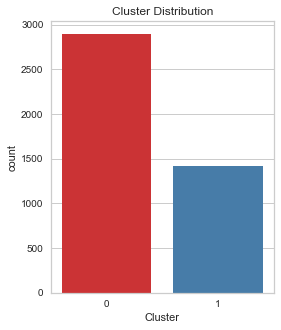

In [85]:
plt.figure(figsize=(4,5))
sns.countplot(data=X_cluster_spec, x='Cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

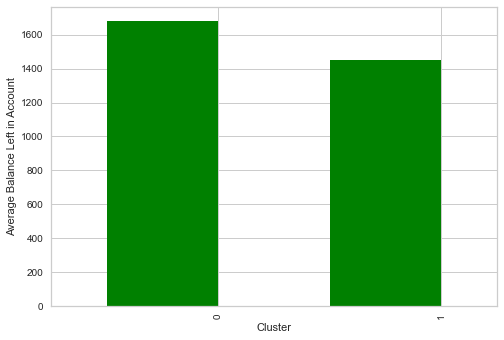

In [96]:
spec1 = X_cluster_spec.groupby('Cluster')['BALANCE'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec1.plot(kind='bar', color='green', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Balance Left in Account')
plt.show()

Cluster 0 has the most users with an averagely high balance on their account, at around $1700. Cluster 1 has the lowest, with users averaging at having only about $1400 in their account.

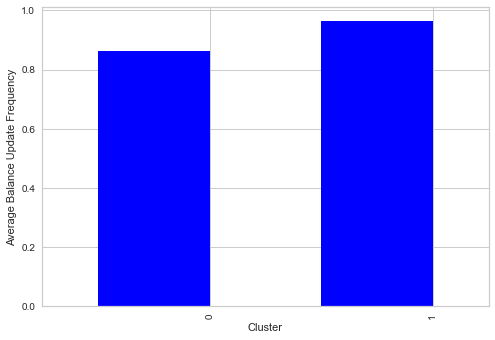

In [97]:
spec2 = X_cluster_spec.groupby('Cluster')['BALANCE_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec2.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Balance Update Frequency')
plt.show()

All Clusters in average update their balances frequently.

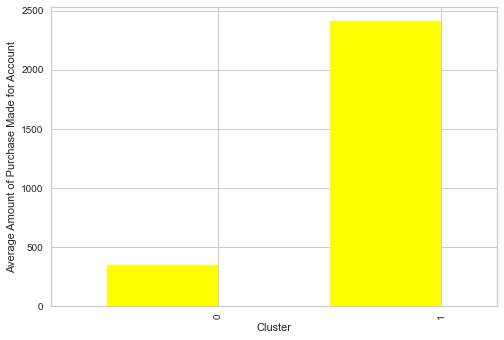

In [98]:
spec3 = X_cluster_spec.groupby('Cluster')['PURCHASES'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec3.plot(kind='bar', color='yellow', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Purchase Made for Account')
plt.show()

Cluster 1 makes the most average amount of purchases at about 2400 purchases made. Cluster 0 has the least average amount of purchases at about 400.

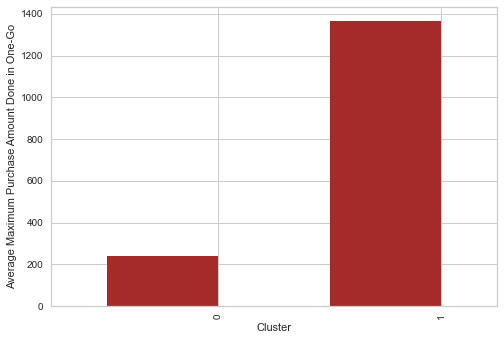

In [99]:
spec4 = X_cluster_spec.groupby('Cluster')['ONEOFF_PURCHASES'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec4.plot(kind='bar', color='brown', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Maximum Purchase Amount Done in One-Go')
plt.show()

Cluster 1 has in average the most Oneoff Purchases / Maximum Purchase Amount done in one-go at about 1400 transactions. Clusters 0 is lowest at only averaging a one-go purchase of about 200.

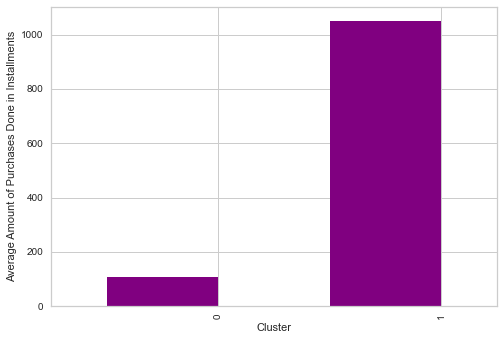

In [100]:
spec5 = X_cluster_spec.groupby('Cluster')['INSTALLMENTS_PURCHASES'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec5.plot(kind='bar', color='purple', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Purchases Done in Installments')
plt.show()

Cluster 1 users have an averagely high amount of purchases done in installments at about 1100. Cluster 0 has the lowest average at about 100.

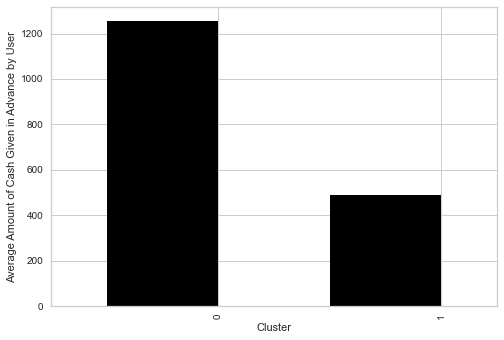

In [101]:
spec6 = X_cluster_spec.groupby('Cluster')['CASH_ADVANCE'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec6.plot(kind='bar', color='black', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Cash Given in Advance by User')
plt.show()

Cluster 0 users have averagely given the most cash in advance at about $1300 given. Cluster 1 is the lowest at about $500 given.

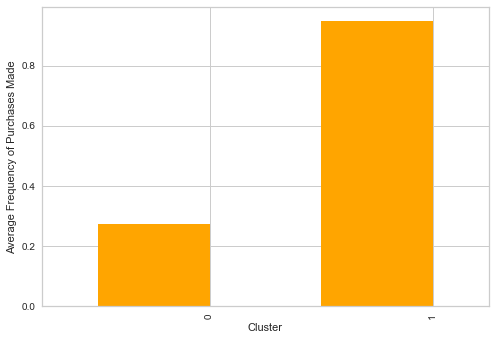

In [102]:
spec7 = X_cluster_spec.groupby('Cluster')['PURCHASES_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec7.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Purchases Made')
plt.show()

Cluster 1 would in average frequently make purchases, whilst users in Clusters 0 would in average infrequently make purchases.

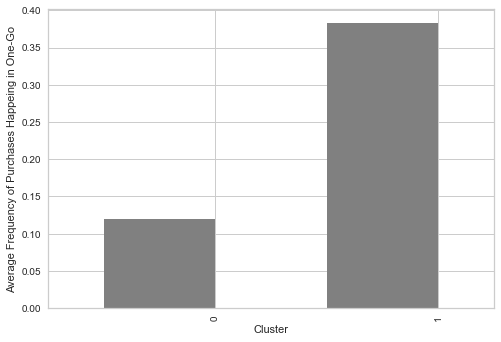

In [103]:
spec8 = X_cluster_spec.groupby('Cluster')['ONEOFF_PURCHASES_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec8.plot(kind='bar', color='grey', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Purchases Happeing in One-Go')
plt.show()

Users in all Clusters would in average infrequently make Oneoff Purchases (high purchase amounts in one-go).

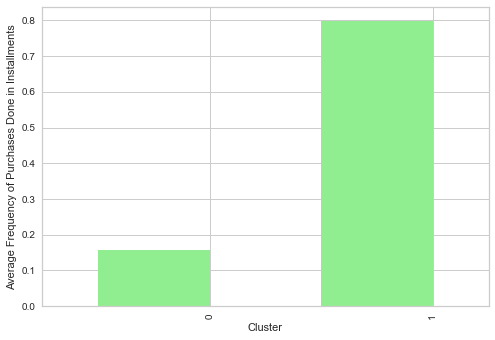

In [104]:
spec9 = X_cluster_spec.groupby('Cluster')['PURCHASES_INSTALLMENTS_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec9.plot(kind='bar', color='lightgreen', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Purchases Done in Installments')
plt.show()

Users in Clusters 1 would in average frequently make purchases done in installments, whilst users in Cluster 0 would in average infrequently do so.

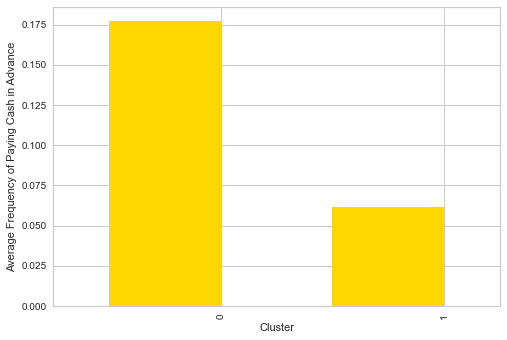

In [105]:
spec10 = X_cluster_spec.groupby('Cluster')['CASH_ADVANCE_FREQUENCY'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec10.plot(kind='bar', color='gold', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Frequency of Paying Cash in Advance')
plt.show()

The users in all Clusters would in average infrequently pay cash in advance.

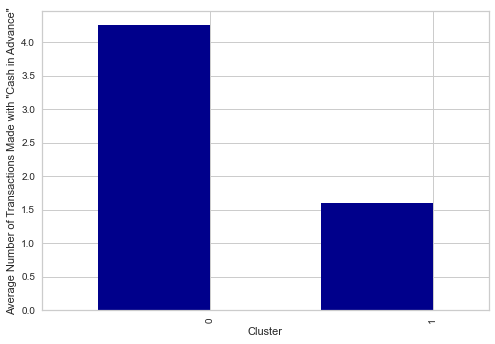

In [106]:
spec11 = X_cluster_spec.groupby('Cluster')['CASH_ADVANCE_TRX'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec11.plot(kind='bar', color='darkblue', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Number of Transactions Made with "Cash in Advance"')
plt.show()

Cluster 1 would make the most average number of transactions with cash in advance per user at an average of 4 transactions done. Cluster 1 would make the least at about 1.5 transactions.

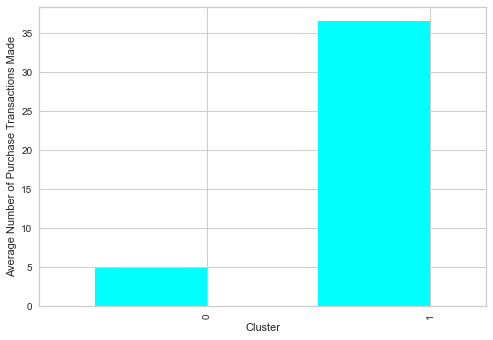

In [107]:
spec12 = X_cluster_spec.groupby('Cluster')['PURCHASES_TRX'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec12.plot(kind='bar', color='cyan', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchase Transactions Made')
plt.show()

Cluster 1 has the most average number of purchase transactions made at about 36 transactions. Cluster 0 has the least at about 5.

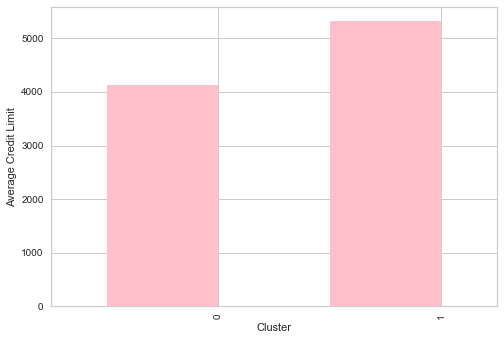

In [108]:
spec13 = X_cluster_spec.groupby('Cluster')['CREDIT_LIMIT'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec13.plot(kind='bar', color='pink', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Credit Limit')
plt.show()

Users in Cluster 1 has the highest average credit limit at about $5000, whilst Cluster 0 has the lowest at about $4000.

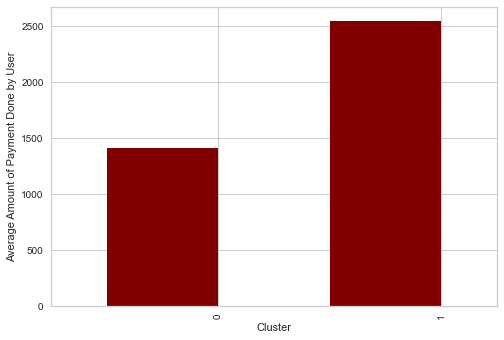

In [109]:
spec14 = X_cluster_spec.groupby('Cluster')['PAYMENTS'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec14.plot(kind='bar', color='maroon', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Amount of Payment Done by User')
plt.show()

Cluster 1 has the highest average amount of payment done by a user, at about $2500. Clusters 0 has the lowest average amount of payment done by a user, at about $1400.

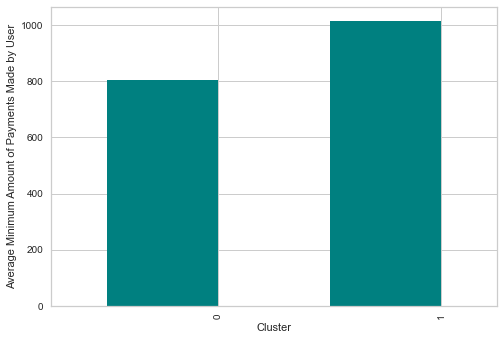

In [110]:
spec15 = X_cluster_spec.groupby('Cluster')['MINIMUM_PAYMENTS'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec15.plot(kind='bar', color='teal', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Minimum Amount of Payments Made by User')
plt.show()

Cluster 1 has the highest average minimum amount of payments made by a user, at about $1000. Cluster 0 has the lowest, averaging a minimum amount of payments per user about $800.

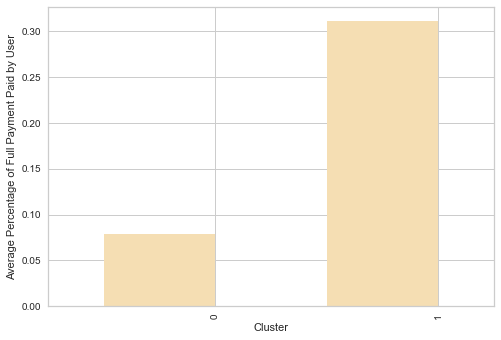

In [111]:
spec16 = X_cluster_spec.groupby('Cluster')['PRC_FULL_PAYMENT'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec16.plot(kind='bar', color='wheat', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Percentage of Full Payment Paid by User')
plt.show()

Cluster 1 has the highest average percentage of full payment paid by a user at about 30%, whilst Cluster 0 has the lowest average percentage at about 8%.

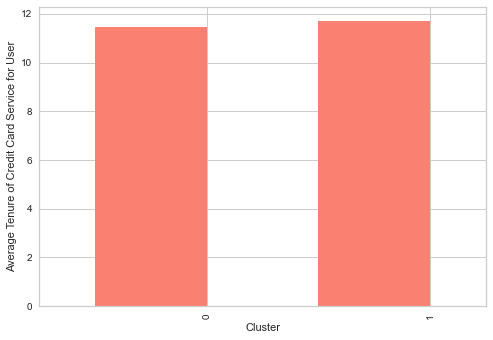

In [112]:
spec17 = X_cluster_spec.groupby('Cluster')['TENURE'].mean()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.5

spec17.plot(kind='bar', color='salmon', ax=ax, width=width, position=1)
plt.xlabel('Cluster')
plt.ylabel('Average Tenure of Credit Card Service for User')
plt.show()

All clusters have an average tenure of about 11.

### c. DBSCAN

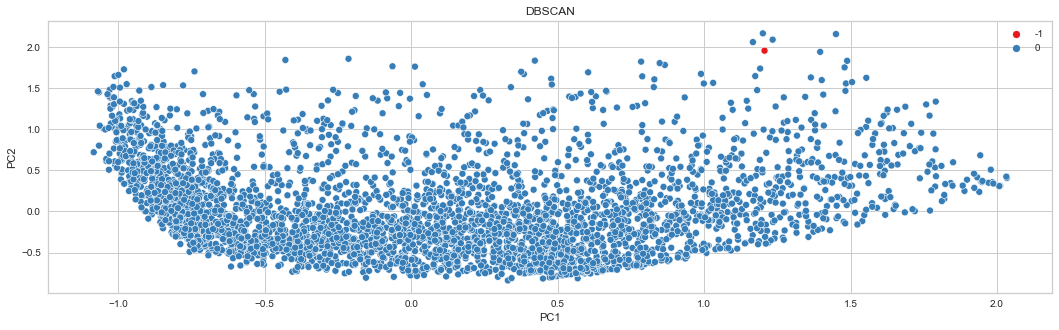

In [88]:
# Visualizing DBSCAN model.
plt.figure(figsize=(18,5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN')
plt.show()

-1 is an outlier.

In [89]:
X_cluster_db = df.copy()
X_cluster_db['Cluster'] = dbscan.labels_
X_cluster_db.sort_values('Cluster')

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2695     4331  7755.698607           1.000000    8533.54           4072.76   
2        6075   757.964752           0.875000     157.40            157.40   
2992     4103    10.035492           1.000000       0.00              0.00   
2993     4113   556.912886           1.000000       0.00              0.00   
2994     4197  3160.087236           1.000000       0.00              0.00   
...       ...          ...                ...        ...               ...   
1520     1527  1606.875936           1.000000    1863.48           1302.00   
1521     1529   230.161419           0.888889     750.05            160.05   
1522     1549   104.572870           1.000000     937.56            630.00   
1508      811  3559.634883           1.000000    7654.81           6984.29   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2695                 4460.78   7540.307350             1.000000   
2                       0.00      0.000000             0.125000   
2992                    0.00    139.113927             0.000000   
2993                    0.00    972.223685             0.000000   
2994                    0.00    757.003109             0.000000   
...                      ...           ...                  ...   
1520                  561.48      0.000000             0.666667   
1521                  590.00      0.000000             0.666667   
1522                  307.56      0.000000             0.666667   
1508                  670.52      0.000000             0.666667   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2695                    0.500000                          0.833333   
2                       0.125000                          0.000000   
2992                    0.000000                          0.000000   
2993                    0.000000                          0.000000   
2994                    0.000000                          0.000000   
...                          ...                               ...   
1520                    0.083333                          0.666667   
1521                    0.111111                          0.555556   
1522                    0.083333                          0.666667   
1508                    0.666667                          0.333333   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2695                0.500000                12             72       10000.0   
2                   0.000000                 0              6        1200.0   
2992                0.083333                 2              0        1000.0   
2993                0.083333                 1              0        4000.0   
2994                0.083333                 1              0        8000.0   
...                      ...               ...            ...           ...   
1520                0.000000                 0             20        6500.0   
1521                0.000000                 0              7       14000.0   
1522                0.000000                 0             13        6000.0   
1508                0.000000                 0             45        7000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2695  4758.209146       7256.951816          0.000000       6       -1  
2     1494.480376       2638.598410          0.000000       8        0  
2992   154.970698         77.402578          0.000000      12        0  
2993  1968.065171        188.435841          0.083333      12        0  
2994   744.908950        715.509134          0.000000      12        0  
...           ...               ... 

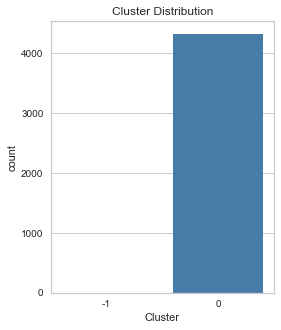

In [90]:
plt.figure(figsize=(4,5))
sns.countplot(data=X_cluster_db, x='Cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

We are not able to discern much from the DBSCAN model because of its limitations to our data. DBSCAN models look for density in data, and since our data is dense / closely placed to one another, DBSCAN is not able to seperate them into their own clusters definitively.

## IX. Model Inference

In [92]:
KM_cluster_0 = X_cluster_km.loc[X_cluster_km['Cluster']== 0]
KM_cluster_0.describe()

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
count  1745.000000  1745.000000        1745.000000  1745.000000   
mean   4547.468768  1037.186292           0.826379   296.523089   
std    2560.923853  1118.384624           0.265345   476.035761   
min       1.000000     0.000000           0.000000     0.000000   
25%    2353.000000   117.018324           0.666667     0.000000   
50%    4591.000000   810.089776           1.000000    95.440000   
75%    6767.000000  1478.552756           1.000000   397.800000   
max    8945.000000  6950.583049           1.000000  4900.000000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       1745.000000             1745.000000   1745.000000   
mean         239.211226               57.362865    440.474299   
std          450.978381              148.563557    693.229447   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%            0.000000                0.000000     72.841356   
75%          280.000000               48.040000    709.485501   
max         4900.000000             3000.000000   7894.578816   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          1745.000000                 1745.000000   
mean              0.189963                    0.116180   
std               0.211104                    0.183345   
min               0.000000                    0.000000   
25%               0.000000                    0.000000   
50%               0.083333                    0.000000   
75%               0.333333                    0.166667   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       1745.000000             1745.000000   
mean                           0.073351                0.098315   
std                            0.133635                0.123759   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.000000                0.083333   
75%                            0.083333                0.166667   
max                            0.500000                0.857143   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       1745.000000    1745.000000   1745.000000   1745.000000   
mean           1.640115       3.391404   3368.741165    933.381829   
std            2.246811       4.698701   2834.371055   1426.126571   
min            0.000000       0.000000    150.000000      0.049513   
25%            0.000000       0.000000   1500.000000    289.967312   
50%            1.000000       2.000000   2500.000000    552.938783   
75%            3.000000       5.000000   4000.000000   1088.224155   
max           14.000000      51.000000  23000.000000  28988.973880   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  Cluster  
count       1745.000000       1745.000000  1745.000000   1745.0  
mean         543.508259          0.071825    11.525501      0.0  
std         1235.011788          0.196410     1.303910      0.0  
min            0.055880          0.000000     6.000000      0.0  
25%          152.925044          0.000000    12.000000      0.0  
50%          271.900890          0.000000    12.000000      0.0  
75%          541.172178          0.000000    12.000000      0.0  
max        19443.453520          1.000000    12.000000      0.0

In [93]:
KM_cluster_1 = X_cluster_km.loc[X_cluster_km['Cluster']== 1]
KM_cluster_1.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count   682.000000    682.000000         682.000000    682.000000   
mean   4399.111437   2280.853119           0.977037   4087.204912   
std    2602.859794   2574.817939           0.081907   3821.590201   
min       9.000000     12.423203           0.181818    467.880000   
25%    2217.500000    433.652497           1.000000   2095.882500   
50%    4395.000000   1364.034977           1.000000   3009.740000   
75%    6654.500000   3143.720148           1.000000   4708.100000   
max    8941.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        682.000000              682.000000    682.000000   
mean        2763.529824             1324.554853    773.744138   
std         3362.620272             1751.983113   2092.254241   
min            0.000000                0.000000      0.000000   
25%         1184.915000              259.197500      0.000000   
50%         1938.285000              793.685000      0.000000   
75%         3231.157500             1682.680000    549.718357   
max        40624.060000            14686.100000  27296.485760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           682.000000                  682.000000   
mean              0.927217                    0.699608   
std               0.133326                    0.281535   
min               0.166667                    0.000000   
25%               0.916667                    0.500000   
50%               1.000000                    0.750000   
75%               1.000000                    1.000000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        682.000000              682.000000   
mean                           0.647764                0.094350   
std                            0.361090                0.179782   
min                            0.000000                0.000000   
25%                            0.416667                0.000000   
50%                            0.750000                0.000000   
75%                            1.000000                0.083333   
max                            1.000000                1.000000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        682.000000     682.000000    682.000000    682.000000   
mean           2.554252      53.208211   7130.351906   4202.317160   
std            6.368343      43.408594   4277.882832   4677.588469   
min            0.000000       3.000000    300.000000     66.610309   
25%            0.000000      27.000000   4000.000000   1677.835306   
50%            0.000000      41.000000   6500.000000   2722.912312   
75%            2.000000      66.750000   9500.000000   4783.609823   
max           51.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Cluster  
count        682.000000        682.000000  682.000000    682.0  
mean        1154.898897          0.255566   11.868035      1.0  
std         3437.340275          0.363800    0.663860      0.0  
min           14.012997          0.000000    6.000000      1.0  
25%          193.301246          0.000000   12.000000      1.0  
50%          416.971473          0.000000   12.000000      1.0  
75%         1148.609782          0.454545   12.000000      1.0  
max        76406.207520          1.000000   12.000000      1.0

In [94]:
KM_cluster_2 = X_cluster_km.loc[X_cluster_km['Cluster']== 2]
KM_cluster_2.describe()

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
count  1211.000000  1211.000000        1211.000000  1211.000000   
mean   4506.701073   685.217897           0.916400   770.872453   
std    2637.492842  1064.185416           0.170406   603.392110   
min       3.000000     0.000000           0.000000    58.320000   
25%    2208.000000    49.736168           0.909091   332.650000   
50%    4499.000000   163.950974           1.000000   580.650000   
75%    6848.000000  1027.909996           1.000000  1063.435000   
max    8949.000000  9919.456275           1.000000  4327.920000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       1211.000000             1211.000000   1211.000000   
mean         162.704426              608.415756    221.202383   
std          283.984558              546.804486    644.162411   
min            0.000000                0.000000      0.000000   
25%            0.000000              249.120000      0.000000   
50%            0.000000              443.100000      0.000000   
75%          219.900000              791.575000      0.000000   
max         1670.500000             4249.920000   7663.906258   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          1211.000000                 1211.000000   
mean              0.867881                    0.120282   
std               0.163162                    0.220331   
min               0.333333                    0.000000   
25%               0.750000                    0.000000   
50%               0.916667                    0.000000   
75%               1.000000                    0.166667   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       1211.000000             1211.000000   
mean                           0.783626                0.045028   
std                            0.231530                0.107231   
min                            0.000000                0.000000   
25%                            0.666667                0.000000   
50%                            0.833333                0.000000   
75%                            1.000000                0.000000   
max                            1.000000                0.714286   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
count       1211.000000    1211.000000   1211.000000  1211.000000   
mean           0.822461      17.287366   3528.536188   958.591266   
std            2.198202      13.172536   2900.098958  1001.667107   
min            0.000000       3.000000    300.000000    16.385421   
25%            0.000000      10.000000   1500.000000   350.025182   
50%            0.000000      13.000000   2500.000000   667.118376   
75%            0.000000      21.000000   5000.000000  1233.855478   
max           28.000000     232.000000  19500.000000  8972.867229   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  Cluster  
count       1211.000000       1211.000000  1211.000000   1211.0  
mean         729.319259          0.290911    11.422791      2.0  
std         2735.628122          0.358715     1.496975      0.0  
min            0.019163          0.000000     6.000000      2.0  
25%          142.434666          0.000000    12.000000      2.0  
50%          178.830469          0.083333    12.000000      2.0  
75%          468.039347          0.555556    12.000000      2.0  
max        56370.041170          1.000000    12.000000      2.0

In [95]:
KM_cluster_3 = X_cluster_km.loc[X_cluster_km['Cluster']== 3]
KM_cluster_3.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count   682.000000    682.000000         682.000000    682.000000   
mean   4316.167155   3998.318422           0.949493    281.717053   
std    2554.344312   2678.505642           0.122400    675.789580   
min      23.000000     36.979201           0.181818      0.000000   
25%    2086.500000   1833.330100           1.000000      0.000000   
50%    4171.000000   3462.670824           1.000000      0.000000   
75%    6530.500000   5638.695749           1.000000    360.225000   
max    8947.000000  16115.596400           1.000000  12650.000000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        682.000000              682.000000    682.000000   
mean         193.280968               88.486994   4049.404779   
std          611.660785              273.719992   3152.357833   
min            0.000000                0.000000    266.975744   
25%            0.000000                0.000000   2236.691134   
50%            0.000000                0.000000   3367.432402   
75%          198.650000                0.000000   4947.067970   
max        12650.000000             3887.000000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           682.000000                  682.000000   
mean              0.189546                    0.096757   
std               0.291066                    0.181301   
min               0.000000                    0.000000   
25%               0.000000                    0.000000   
50%               0.000000                    0.000000   
75%               0.282467                    0.090909   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        682.000000              682.000000   
mean                           0.103094                0.454429   
std                            0.234533                0.219071   
min                            0.000000                0.083333   
25%                            0.000000                0.272727   
50%                            0.000000                0.416667   
75%                            0.000000                0.583333   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        682.000000     682.000000    682.000000    682.000000   
mean          13.168622       4.107038   6614.253977   3002.415674   
std           12.396154       7.739062   3658.393034   3341.299605   
min            1.000000       0.000000     50.000000     46.969049   
25%            7.000000       0.000000   3500.000000   1066.318414   
50%           10.000000       0.000000   6000.000000   1796.748957   
75%           16.000000       5.000000   9000.000000   3775.667115   
max          123.000000      68.000000  19600.000000  39048.597620   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Cluster  
count        682.000000        682.000000  682.000000    682.0  
mean        1695.470684          0.029806   11.439883      3.0  
std         2751.676338          0.086747    1.325252      0.0  
min           19.492021          0.000000    6.000000      3.0  
25%          583.712805          0.000000   12.000000      3.0  
50%         1156.517394          0.000000   12.000000      3.0  
75%         1912.623539          0.000000   12.000000      3.0  
max        42629.551170          1.000000   12.000000      3.0

In [ ]:
# Create Inference Data by inputting mean of the four dataframes with each unique cluster (Clusters 0 - 3 from K-Means model).
inf_trial = pd.DataFrame([[1037.19, 0.83, 296.5, 239.2, 57.36, 440.47, 0.19, 0.12, 0.07, 0.09, 1.64, 3.39, 3368.74, 933.38, 543.51, 0.07, 11.525501],
[2280.85, 0.98, 4087.21, 2763.53, 1324.56, 773.74, 0.93, 0.7, 0.65, 0.09, 2.55, 53.21, 7130.35, 4202.32, 1154.9, 0.26, 211.87],
[685.22, 0.92, 770.87, 162.7, 608.42, 221.2, 0.87, 0.12, 0.78, 0.05, 0.82, 17.29, 3528.54, 958.59, 729.32, 0.29, 11.42],
[3998.32, 0.95, 281.72, 193.28, 88.49, 4049.41, 0.19, 0.09, 0.1, 0.45, 13.17, 4.11, 6614.25, 3002.42, 1695.47, 0.03, 11.44]],
     columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
     'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
     
inf_trial

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  1037.19               0.83     296.50            239.20   
1  2280.85               0.98    4087.21           2763.53   
2   685.22               0.92     770.87            162.70   
3  3998.32               0.95     281.72            193.28   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   57.36        440.47                 0.19   
1                 1324.56        773.74                 0.93   
2                  608.42        221.20                 0.87   
3                   88.49       4049.41                 0.19   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.12                              0.07   
1                        0.70                              0.65   
2                        0.12                              0.78   
3                        0.09                              0.10   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.09              1.64           3.39       3368.74   
1                    0.09              2.55          53.21       7130.35   
2                    0.05              0.82          17.29       3528.54   
3                    0.45             13.17           4.11       6614.25   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
0    933.38            543.51              0.07   11.525501  
1   4202.32           1154.90              0.26  211.870000  
2    958.59            729.32              0.29   11.420000  
3   3002.42           1695.47              0.03   11.440000

In [ ]:
# Splitting dataset where inf_toscale is features that have not been scaled, and inf_noscale have been scaled.
inf_toscale = inf_trial.drop(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis=1)
inf_noscale = inf_trial[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]

In [ ]:
# Defining scaler.
scaler = MinMaxScaler()

# Fitting features to be scaled.
scaler.fit(inf_toscale)

# Scaling features.
inf_scaled = scaler.transform(inf_toscale)

In [ ]:
# Switching dataset back to dataframe.
inf_scaled = pd.DataFrame(inf_scaled)

In [ ]:
# Concat / rejoining scaled and non-scaled data.
inf_concat = pd.concat([inf_scaled,inf_noscale.reset_index(drop=True)],axis=1)

In [ ]:
# Changing final concat dataset to array for PCA process.
inf_final=np.array(inf_concat)

In [ ]:
# Transforming dataset.
inf_pred = pca2.transform(inf_final)
inf_pred.shape

(4, 7)

In [ ]:
kmeans.predict(inf_pred)

array([0, 1, 2, 3])

The model is able to predict a test / inference set. With the inference data being inputted following the average of features in each cluster from our original K-Means model, we can conclude that the inference set has been accurately clustered.

## X. Conclusion

Based on the Model Evaluation above, we can conclude the following for the Customer Segmentation from the K-Means model:

- The users in all Clusters would in average infrequently pay cash in advance. Also, all Clusters in average update their balances frequently. In addition, all clusters have an average tenure of about 11.

- Clusters 1 and 2 would in average frequently make purchases, whilst users in Clusters 0 and 3 would in average infrequently make purchases.

- Users in Clusters 1 and 2 would in average frequently make purchases done in installments, whilst Clusters 0 and 3 would in average infrequently do so.

- Cluster 2 has the highest average percentage of full payment paid by a user at almost 30%. Cluster 3 is the lowest, with an average percentage of about 2.5%.


- Users in Cluster 1 would in average frequently make high purchase amounts in one-go, whilst the rest would in average infrequently do so.

- Cluster 1 has the most average number of purchase transactions made at about 50 transactions. Cluster 2 averages the lowest at about 18 purchase transactions done per user.

- Users in Cluster 1 has the highest average credit limit at about $7000, whilst Cluster 0 has the lowest at about $3200.

- Cluster 1 has the highest average amount of payment done by a user, at about $4200. Clusters 0 and 2 has the lowest average amount of payment done by a user, at close to $1000 each.

- Cluster 1 makes the most average amount of purchases at about 4000 purchases made. Cluster 0 and Cluster 3 have the least at about 300 each.

- Cluster 1 has in average the most Maximum Purchase Amount done in one-go at 2700 transactions. Clusters 0, 2, and 3 has the lowest at 250.

- Cluster 1 users have an averagely high amount of purchases done in installments at about 1300. Clusters 0 and 3 have the lowest average at about 60.

- Cluster 3 has most users with an averagely high balance on their account, at around $4000. Cluster 2 has the lowest, at only about $700.

- Cluster 3 users have averagely given the most cash in advance at about $4000 given. Clusters 2 stands the lowest, at an average of $200.

- Cluster 3 would make the most average number of transactions with cash in advance per user at an average of 13 transactions done. Clusters 0, 1, and 2 
would make the least at about 1 - 2 transactions each.

- Cluster 3 has the highest average minimum amount of payments made by a user, at about $1700. Clusters 0 has the lowest average at $550.




For the Customer Segmentation from the Spectral Clustering model, we can conclude that:

- Both Clusters in average update their balances frequently. In addition, users in these two Clusters would in average infrequently make Oneoff Purchases (high purchase amounts in one-go). Also, users in all Clusters would in average infrequently pay cash in advance. Lastly, users in each of these clusters have an average tenure of about 11.

- Cluster 0 has the most users with an averagely high balance on their account, at around $1700. Cluster 1 has the lowest, with users averaging at having only about $1400 in their account.

- Cluster 0 users have averagely given the most cash in advance at about $1300 given. Cluster 1 is the lowest at about $500 given.

- Cluster 1 makes the most average amount of purchases at about 2400 purchases made. Cluster 0 has the least average amount of purchases at about 400.

- Cluster 1 has in average the most Oneoff Purchases / Maximum Purchase Amount done in one-go at about 1400 transactions. Clusters 0 is lowest at only averaging a one-go purchase of about 200.

- Cluster 1 users have an averagely high amount of purchases done in installments at about 1100. Cluster 0 has the lowest average at about 100.

- Cluster 1 would in average frequently make purchases, whilst users in Clusters 0 would in average infrequently make purchases.

- Users in Clusters 1 would in average frequently make purchases done in installments, whilst users in Cluster 0 would in average infrequently do so.

- Cluster 1 would make the most average number of transactions with cash in advance per user at an average of 4 transactions done. Cluster 1 would make the least at about 1.5 transactions.

- Cluster 1 has the most average number of purchase transactions made at about 36 transactions. Cluster 0 has the least at about 5.

- Users in Cluster 1 has the highest average credit limit at about $5000, whilst Cluster 0 has the lowest at about $4000.

- Cluster 1 has the highest average amount of payment done by a user, at about $2500. Clusters 0 has the lowest average amount of payment done by a user, at about $1400.

- Cluster 1 has the highest average minimum amount of payments made by a user, at about $1000. Cluster 0 has the lowest, averaging a minimum amount of payments per user about $800.

- Cluster 1 has the highest average percentage of full payment paid by a user at about 30%, whilst Cluster 0 has the lowest average percentage at about 8%.

We are not able to ascertain any information from the DBSCAN model.